In [1]:
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

In [2]:
class Bandit:
    def __init__(self, k=10):
        self.k = k
        self.mu = np.random.normal(0, 1, self.k)  # True means for each arm

    def pull(self, action):
        # Simulate pulling arm "action"
        #sample the reward from a normal distribution with mean self.mu[action] and s.d 1
        reward = np.random.normal(self.mu[action], 1)
        return reward

    def optimal_action(self):
        return np.argmax(self.mu)


In [3]:
k = 10


#  greedy with non-optimistic initial values

In [4]:
class Greedy:
    def __init__(self, k):
        self.k = k
        self.Q = np.zeros(k)  # action-value estimates
        self.N = np.zeros(k)  # count for each arm

    def select_action(self):
        # since all Q value are equal at the first step this help initialize randomly picking an arm
        # # and after the first steps it picks the index with the max value in Q
        return np.random.choice(np.flatnonzero(self.Q == self.Q.max()))

    def update(self, action, reward):
        self.N[action] += 1
        self.Q[action] += (reward - self.Q[action]) / self.N[action]


In [5]:



# Simulation parameters
np.random.seed(42)



In [6]:
def greedy_simulation(agent_class, k=10, steps=2000, simulations=1000):
    all_rewards = np.zeros((simulations, steps))
    optimal_action_counts = np.zeros((simulations, steps))

    for sim in range(simulations):
        bandit = Bandit(k)
        optimal_action = bandit.optimal_action()
        agent = agent_class(k)

        for t in range(steps):
            action = agent.select_action()
            reward = bandit.pull(action)
            agent.update(action, reward)

            all_rewards[sim, t] = reward
            optimal_action_counts[sim, t] = (action == optimal_action)

    avg_rewards = all_rewards.mean(axis=0)
    optimal_pct = optimal_action_counts.mean(axis=0) * 100
    return avg_rewards, optimal_pct


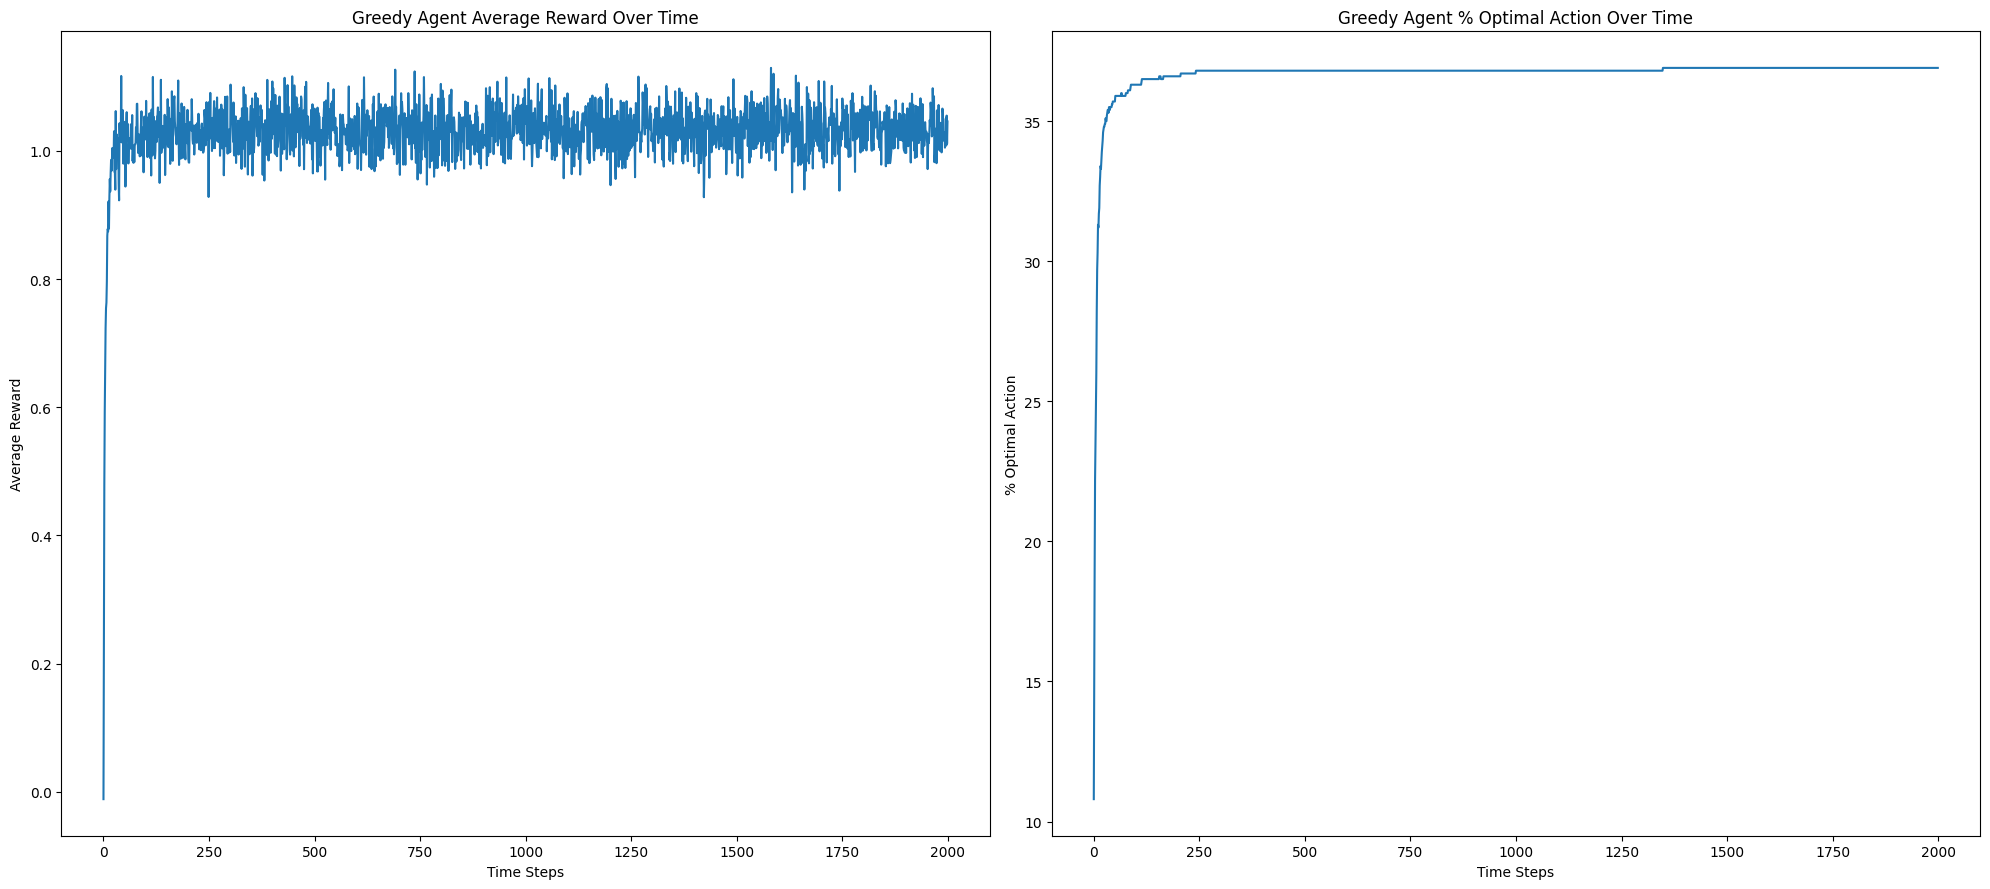

In [7]:
 import matplotlib.pyplot as plt


def plot_results(avg_rewards, optimal_action_pct, title=''):
    plt.figure(figsize=(20, 9))

    plt.subplot(1, 2, 1)
    plt.plot(avg_rewards)
    plt.xlabel('Time Steps')
    plt.ylabel('Average Reward')
    plt.title(f'{title} Average Reward Over Time')

    plt.subplot(1, 2, 2)
    plt.plot(optimal_action_pct)
    plt.xlabel('Time Steps')
    plt.ylabel('% Optimal Action')
    plt.title(f'{title} % Optimal Action Over Time')

    plt.tight_layout()
    plt.show()
avg_rewards, opt_pct = greedy_simulation(Greedy)
plot_results(avg_rewards, opt_pct, title='Greedy Agent')


# epsilon-greedy

In [8]:
# It might get stuck in local optima so greedy epislion genrates a random number and if it less than epsilon you randomly select a k but if not it does the same as greedy
class EpsilonGreedy:
    def __init__(self, k, epsilon):
        self.k = k
        self.epsilon = epsilon
        self.Q = np.zeros(k)  # action-value estimates
        self.N = np.zeros(k)  # count for each arm

    def select_action(self):
        # epsilon part: explore
        if np.random.rand() < self.epsilon:
            return np.random.randint(self.k)
        else:
            # exploit: pick max Q
            return np.random.choice(np.flatnonzero(self.Q == self.Q.max()))

    def update(self, action, reward):
        self.N[action] += 1
        self.Q[action] += (reward - self.Q[action]) / self.N[action]


In [9]:
def epsilon_simulation(agent_class, k, steps, simulations, epsilon=None):
    all_rewards = np.zeros((simulations, steps))
    optimal_action_counts = np.zeros((simulations, steps))

    for sim in range(simulations):
        true_means = np.random.normal(0, 1, k)
        optimal_action = np.argmax(true_means)

        if epsilon is not None:
            agent = agent_class(k, epsilon)
        else:
            agent = agent_class(k)

        for t in range(steps):
            action = agent.select_action()
            reward = np.random.normal(true_means[action], 1)
            agent.update(action, reward)
            all_rewards[sim, t] = reward
            if action == optimal_action:
                optimal_action_counts[sim, t] = 1

    average_rewards = all_rewards.mean(axis=0)
    optimal_action_percentage = optimal_action_counts.mean(axis=0) * 100
    return average_rewards, optimal_action_percentage


In [10]:
# Simulation parameters
k = 10
steps = 2000
simulations = 200
epsilon_values = [0.01, 0.05, 0.1, 0.2, 0.3]

results = {}

for eps in epsilon_values:
    print(f"Running epsilon = {eps}")
    avg_rewards, opt_percentage = epsilon_simulation(EpsilonGreedy, k, steps, simulations, epsilon=eps)
    results[eps] = (avg_rewards, opt_percentage)


Running epsilon = 0.01
Running epsilon = 0.05
Running epsilon = 0.1
Running epsilon = 0.2
Running epsilon = 0.3


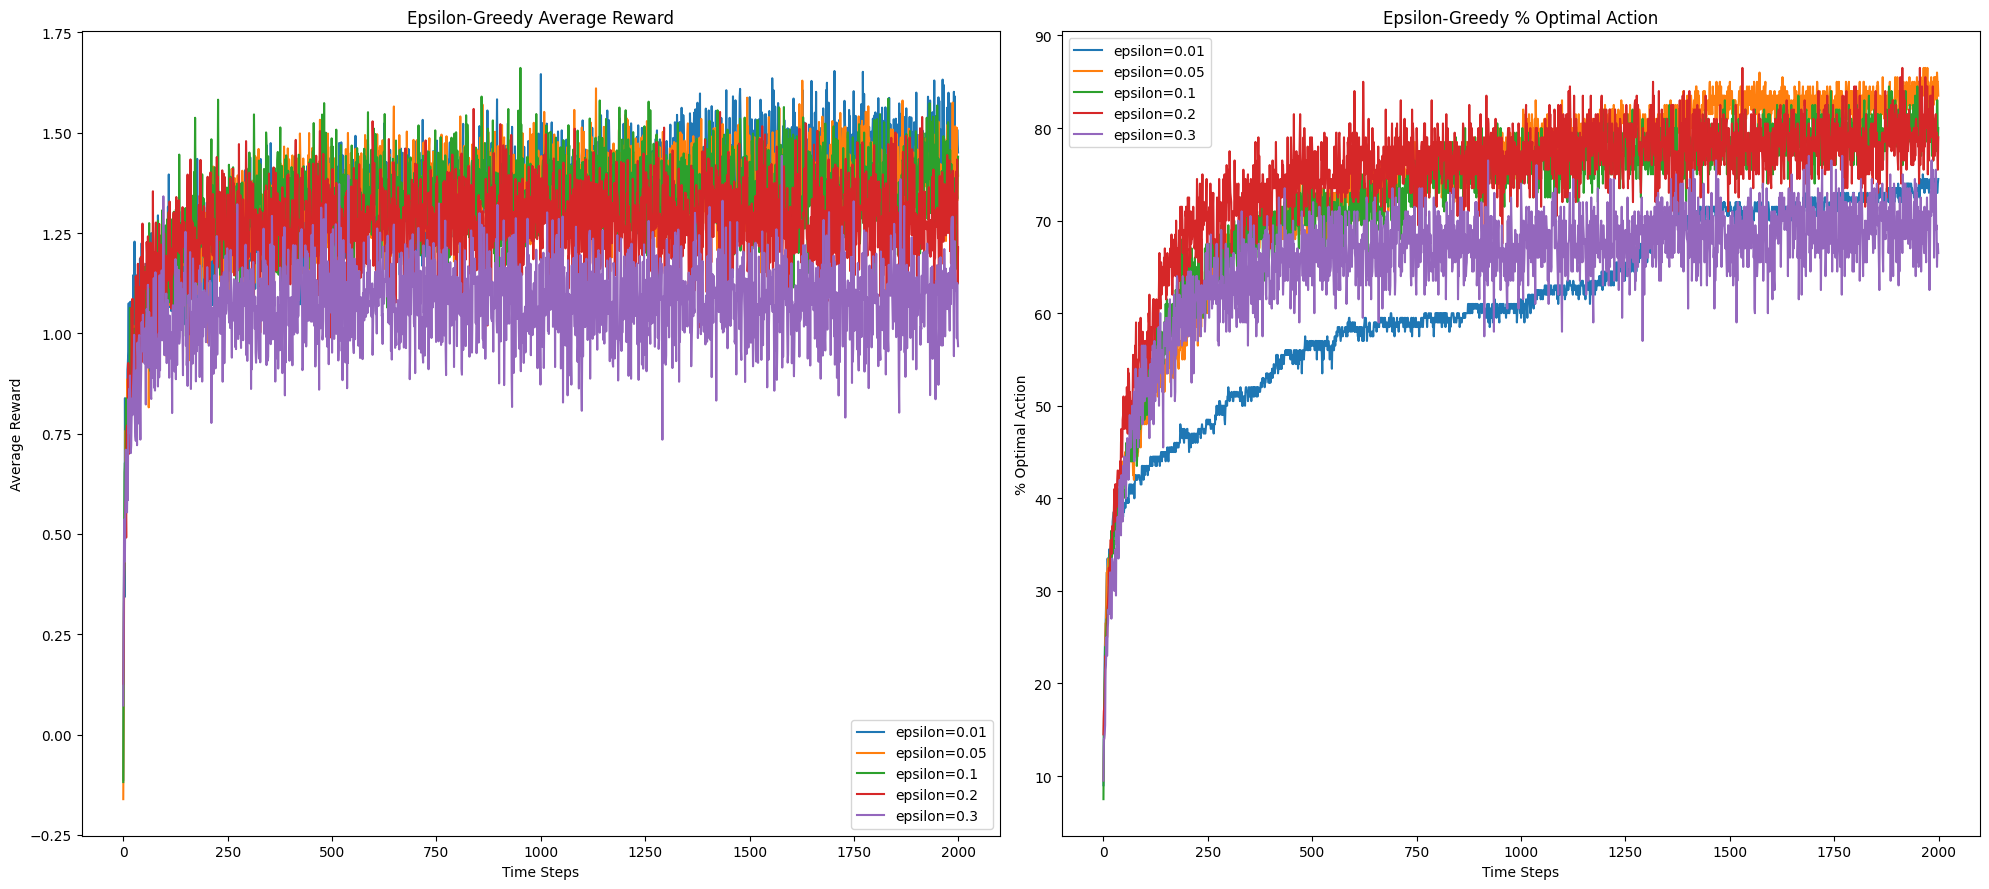

In [11]:


import matplotlib.pyplot as plt

def plot_epsilon_gradient(results_dict, param_values, param_name="epsilon", title_prefix=""):


    # results_dict : mapping from param_value to (avg_reward, optimal_action_percentage)
    # param_values (list): list of parameter values to include in the plot

    plt.figure(figsize=(20, 9))

    # Average Reward Plot
    plt.subplot(1, 2, 1)
    for param in param_values:
        avg_reward, _ = results_dict[param]
        plt.plot(avg_reward, label=f"{param_name}={param}")
    plt.xlabel("Time Steps")
    plt.ylabel("Average Reward")
    plt.title(f"{title_prefix} Average Reward")
    plt.legend()

    # Optimal Action % Plot
    plt.subplot(1, 2, 2)
    for param in param_values:
        _, opt_action_pct = results_dict[param]
        plt.plot(opt_action_pct, label=f"{param_name}={param}")
    plt.xlabel("Time Steps")
    plt.ylabel("% Optimal Action")
    plt.title(f"{title_prefix} % Optimal Action")
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_epsilon_gradient(
    results_dict=results,
    param_values=epsilon_values,
    param_name="epsilon",
    title_prefix="Epsilon-Greedy"
)




# OptimisticGreedy

In [12]:

class OptimisticGreedy:
    def __init__(self, k, optimistic_value):
        self.k = k
        self.Q = np.full(k, optimistic_value)  # set optimistic initial values
        self.N = np.zeros(k)

    def select_action(self):
        # greedy action selection with tie-breaking
        return np.random.choice(np.flatnonzero(self.Q == self.Q.max()))


    def update(self, action, reward):
        self.N[action] += 1
        self.Q[action] += (reward - self.Q[action]) / self.N[action]


In [13]:
from scipy.stats import norm
# We need to calculate the 99.5th percentile for each simulation, based on the highest μi.
def compute_optimistic_value(true_means):
    best_mu = np.max(true_means)
    optimistic_value = norm.ppf(0.995, loc=best_mu, scale=1)
    return optimistic_value


In [14]:
def optimistic_simulation(k, steps, simulations):
    # Preallocate arrays for reward and optimal action tracking
    all_rewards = np.zeros((simulations, steps))
    optimal_action_counts = np.zeros((simulations, steps))

    for sim in range(simulations):
        # Generate true reward means for this bandit instance
        true_means = np.random.normal(0, 1, k)
        # Identify the optimal action (highest true mean)
        optimal_action = np.argmax(true_means)
        # Compute the initial optimistic Q value for all arms
        optimistic_value = compute_optimistic_value(true_means)
        # Create the optimistic greedy agent
        agent = OptimisticGreedy(k, optimistic_value)

        for t in range(steps):
            # Agent selects an action
            action = agent.select_action()
            # Environment returns a reward sampled from N(mu, 1)
            reward = np.random.normal(true_means[action], 1)
            # Agent updates internal Q-value estimates
            agent.update(action, reward)
            # Record the reward received
            all_rewards[sim, t] = reward
            # Record if the optimal action was taken
            optimal_action_counts[sim, t] = (action == optimal_action)

    # Compute average reward and optimal action % across all simulations
    avg_rewards = all_rewards.mean(axis=0)
    opt_action_pct = optimal_action_counts.mean(axis=0) * 100
    return avg_rewards, opt_action_pct

avg_rewards, opt_pct = optimistic_simulation(k, steps, simulations)

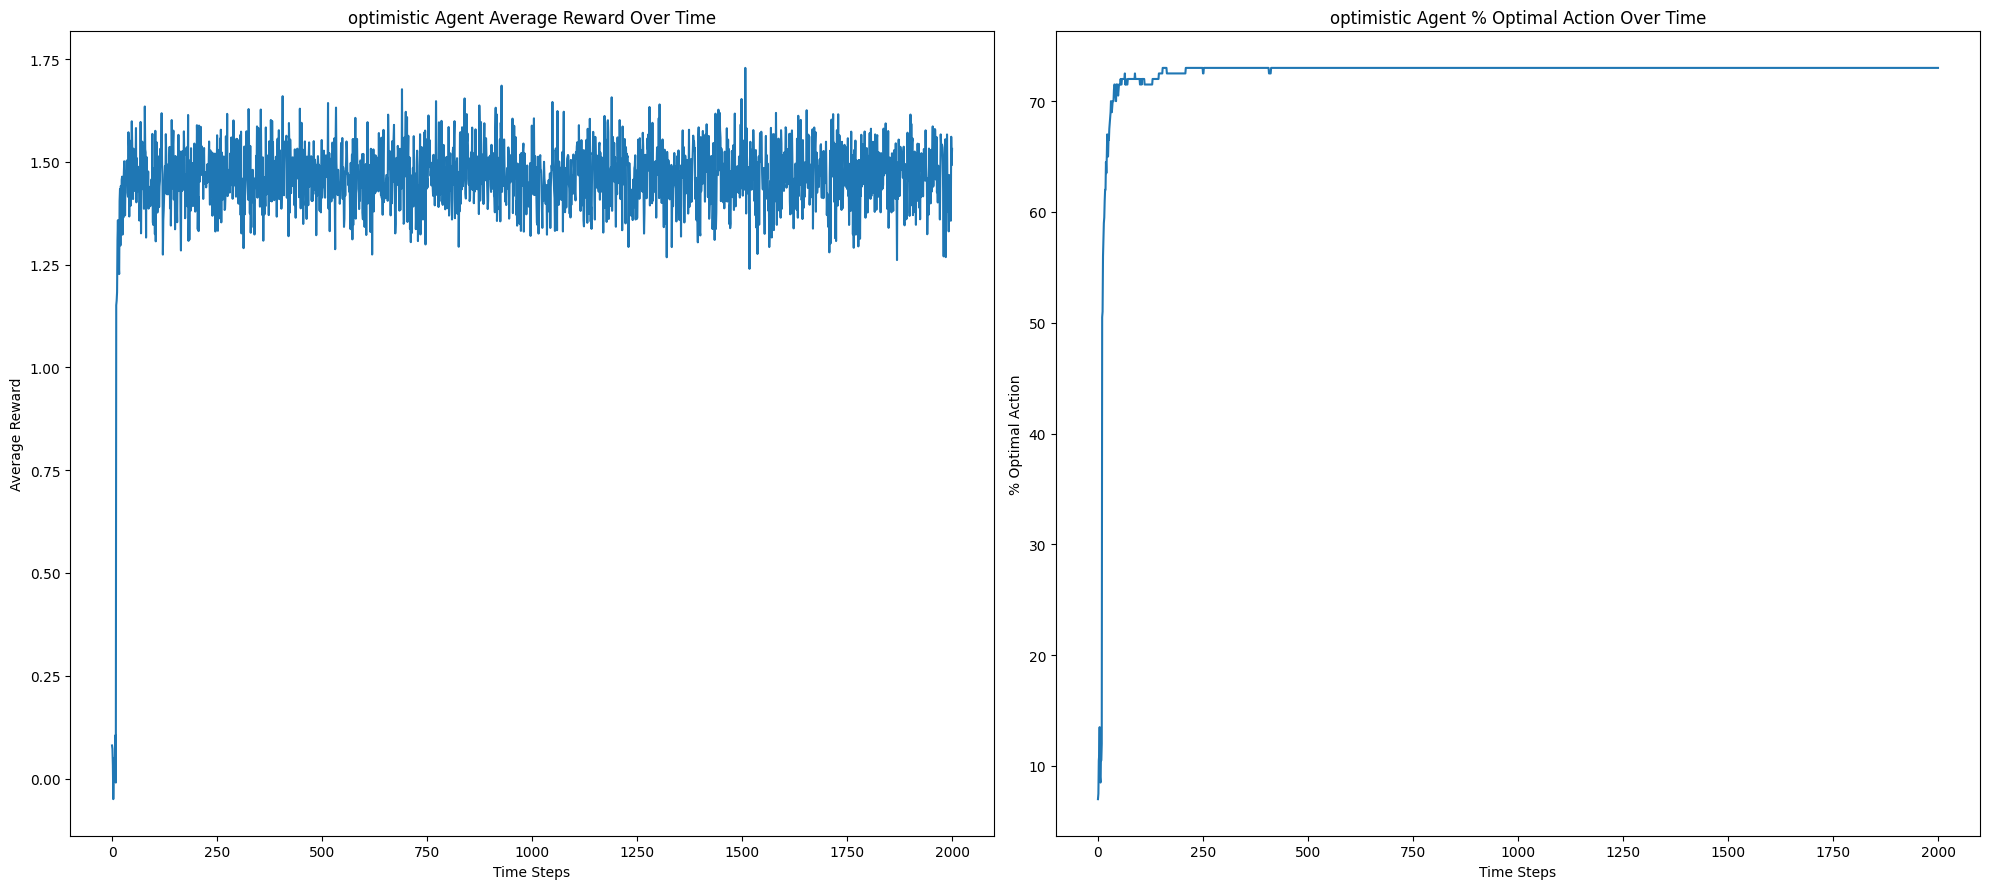

In [15]:
plot_results(avg_rewards, opt_pct, title='optimistic Agent')


In [16]:
#



In [17]:
class GradientBandit:
    def __init__(self, k, alpha):
        self.k = k
        self.alpha = alpha
        self.H = np.zeros(k)
        self.pi = np.ones(k) / k
        self.average_reward = 0
        self.time = 0

    def select_action(self):
        # compute softmax probabilities from preferences
        expH = np.exp(self.H - np.max(self.H))
        self.pi = expH / np.sum(expH)
        # sample action based on probabilities
        return np.random.choice(self.k, p=self.pi)

    def update(self, action, reward):
        self.time += 1
        # update running average reward
        self.average_reward += (reward - self.average_reward) / self.time

        # update preferences using gradient ascent rule
        for a in range(self.k):
            if a == action:
                self.H[a] += self.alpha * (reward - self.average_reward) * (1 - self.pi[a])
            else:
                self.H[a] -= self.alpha * (reward - self.average_reward) * self.pi[a]


In [18]:
def gradient_simulation(k, steps, simulations, alpha):
    all_rewards = np.zeros((simulations, steps))
    optimal_action_counts = np.zeros((simulations, steps))

    for sim in range(simulations):
        true_means = np.random.normal(0, 1, k)
        optimal_action = np.argmax(true_means)
        agent = GradientBandit(k, alpha)

        for t in range(steps):
            action = agent.select_action()
            reward = np.random.normal(true_means[action], 1)
            agent.update(action, reward)
            all_rewards[sim, t] = reward
            if action == optimal_action:
                optimal_action_counts[sim, t] = 1

    average_rewards = all_rewards.mean(axis=0)
    optimal_action_percentage = optimal_action_counts.mean(axis=0) * 100
    return average_rewards, optimal_action_percentage


In [19]:
alpha_values = [0.01, 0.05, 0.1, 0.2, 0.4]
results = {}

for alpha in alpha_values:
    print(f"Running alpha = {alpha}")
    avg_rewards, opt_percentage = gradient_simulation(k=10, steps=2000, simulations=200, alpha=alpha)
    results[alpha] = (avg_rewards, opt_percentage)


Running alpha = 0.01
Running alpha = 0.05
Running alpha = 0.1
Running alpha = 0.2
Running alpha = 0.4


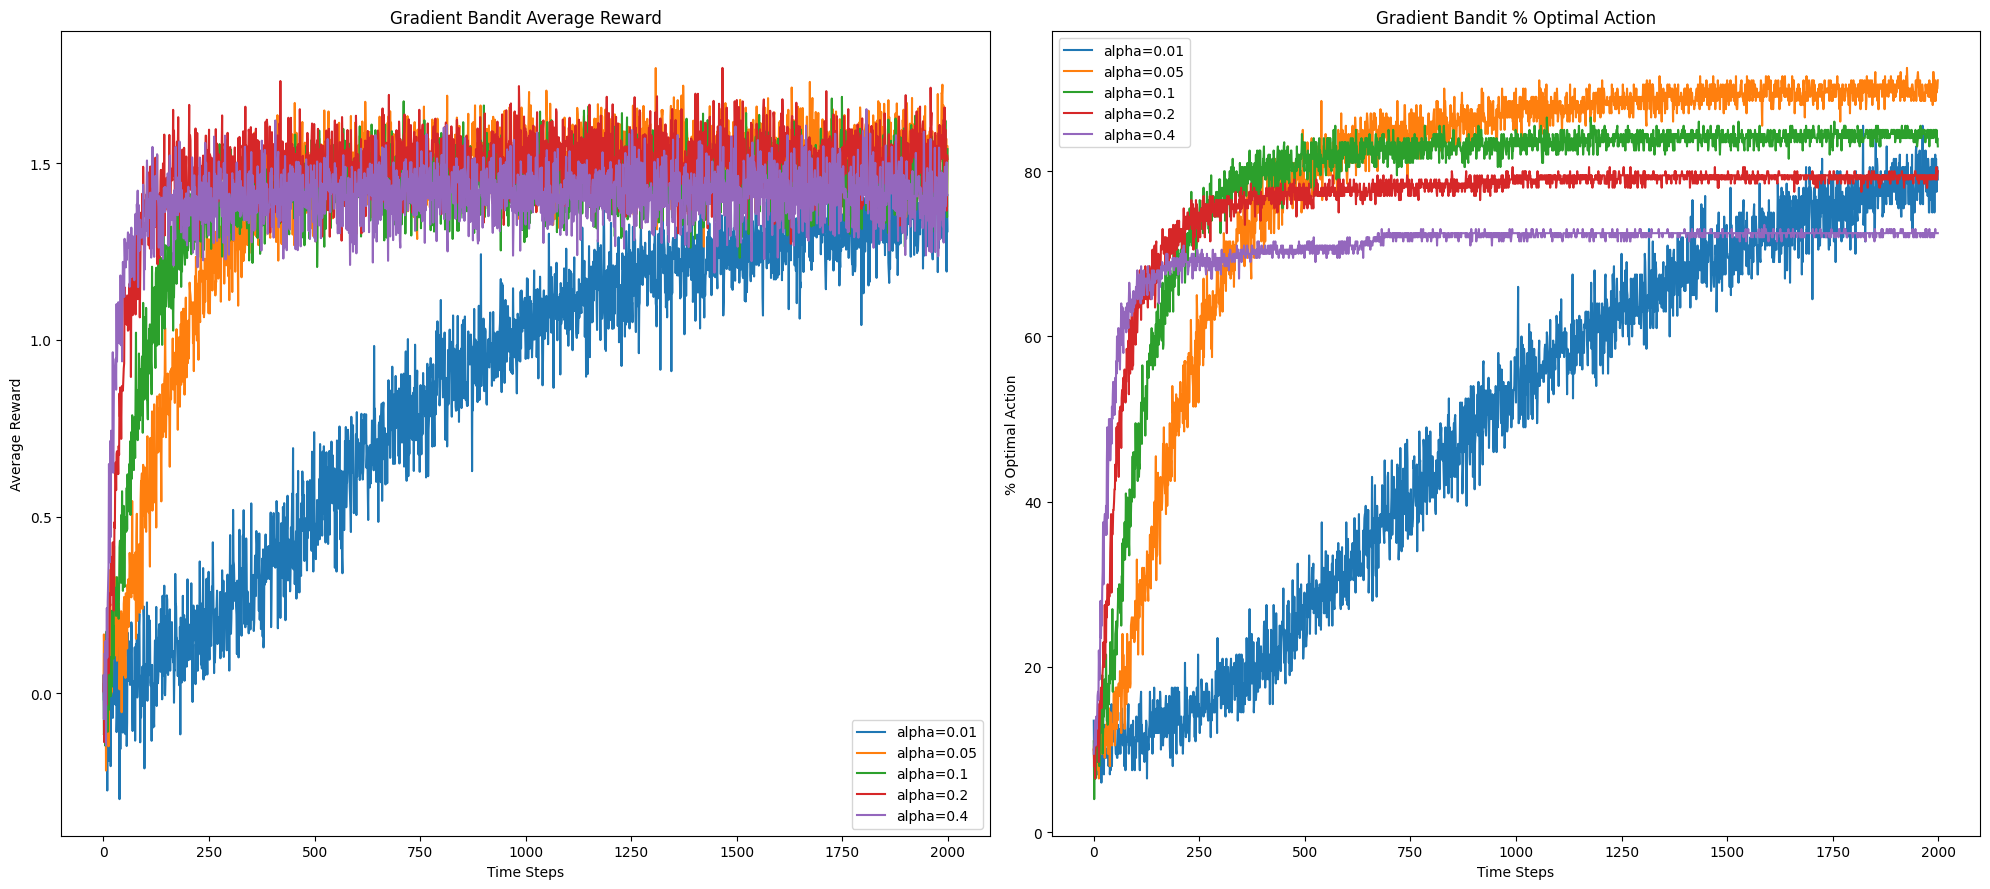

In [20]:
plot_epsilon_gradient(
    results_dict=results,
    param_values=alpha_values,
    param_name="alpha",
    title_prefix="Gradient Bandit"
)


# **Non Stationary**

In [21]:
class GradualDriftBandit:
    def __init__(self, k, drift_std=0.01):
        self.k = k
        self.drift_std = drift_std
        self.true_means = np.random.normal(0, 1, self.k)

    def update_means(self):
        self.true_means += np.random.normal(0, self.drift_std, self.k)

    def pull(self, action):
        return np.random.normal(self.true_means[action], 1)

    def optimal_action(self):
        return np.argmax(self.true_means)


In [22]:
class MeanRevertingBandit:
    def __init__(self, k, kappa=0.5, drift_std=0.01):
        self.k = k
        self.kappa = kappa
        self.drift_std = drift_std
        self.true_means = np.random.normal(0, 1, self.k)

    def update_means(self):
        self.true_means = self.kappa * self.true_means + np.random.normal(0, self.drift_std, self.k)

    def pull(self, action):
        return np.random.normal(self.true_means[action], 1)

    def optimal_action(self):
        return np.argmax(self.true_means)


In [23]:
# greedy

In [24]:
def nonstationary_simulation(agent_class, bandit_class, k, steps, simulations, epsilon=None, alpha=None):
    all_rewards = np.zeros((simulations, steps))
    optimal_action_counts = np.zeros((simulations, steps))

    for sim in range(simulations):
        # Create new non-stationary bandit for each simulation
        bandit = bandit_class(k)

        # Initialize agent based on which algorithm you're using
        if epsilon is not None:
            agent = agent_class(k, epsilon)
        elif alpha is not None:
            agent = agent_class(k, alpha)
        else:
            agent = agent_class(k)

        for t in range(steps):
            # Update true means at every time step (non-stationary part)
            bandit.update_means()

            # Get optimal arm after updating means
            optimal_action = bandit.optimal_action()

            # Agent selects action
            action = agent.select_action()

            # Pull arm and receive reward
            reward = bandit.pull(action)

            # Update agent
            agent.update(action, reward)

            # Store results
            all_rewards[sim, t] = reward
            optimal_action_counts[sim, t] = (action == optimal_action)

    average_rewards = all_rewards.mean(axis=0)
    optimal_action_percentage = optimal_action_counts.mean(axis=0) * 100
    return average_rewards, optimal_action_percentage


# GradualDriftBandit

# Greedy non stationary

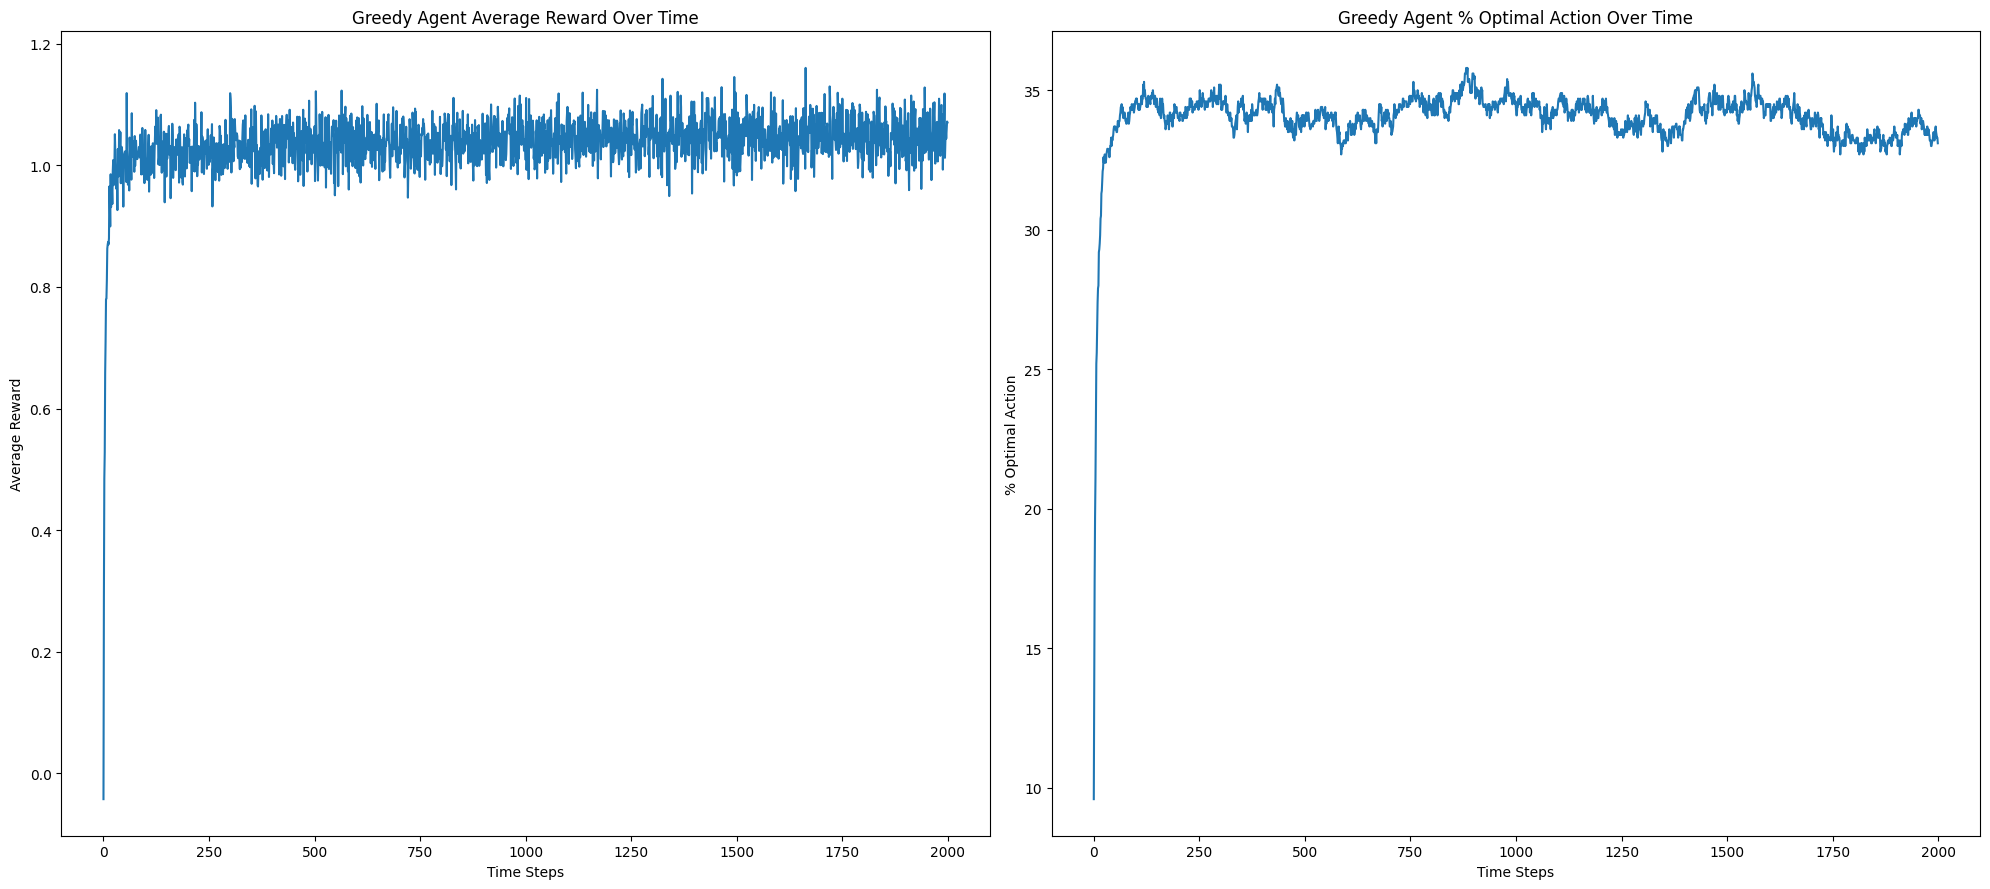

In [25]:
avg_rewards_greedy, opt_percentage_greedy = nonstationary_simulation(
    Greedy,
    GradualDriftBandit,
    k=10,
    steps=2000,
    simulations=1000
)

plot_results(avg_rewards_greedy, opt_percentage_greedy, title='Greedy Agent')

# Greedy epilson non statinary

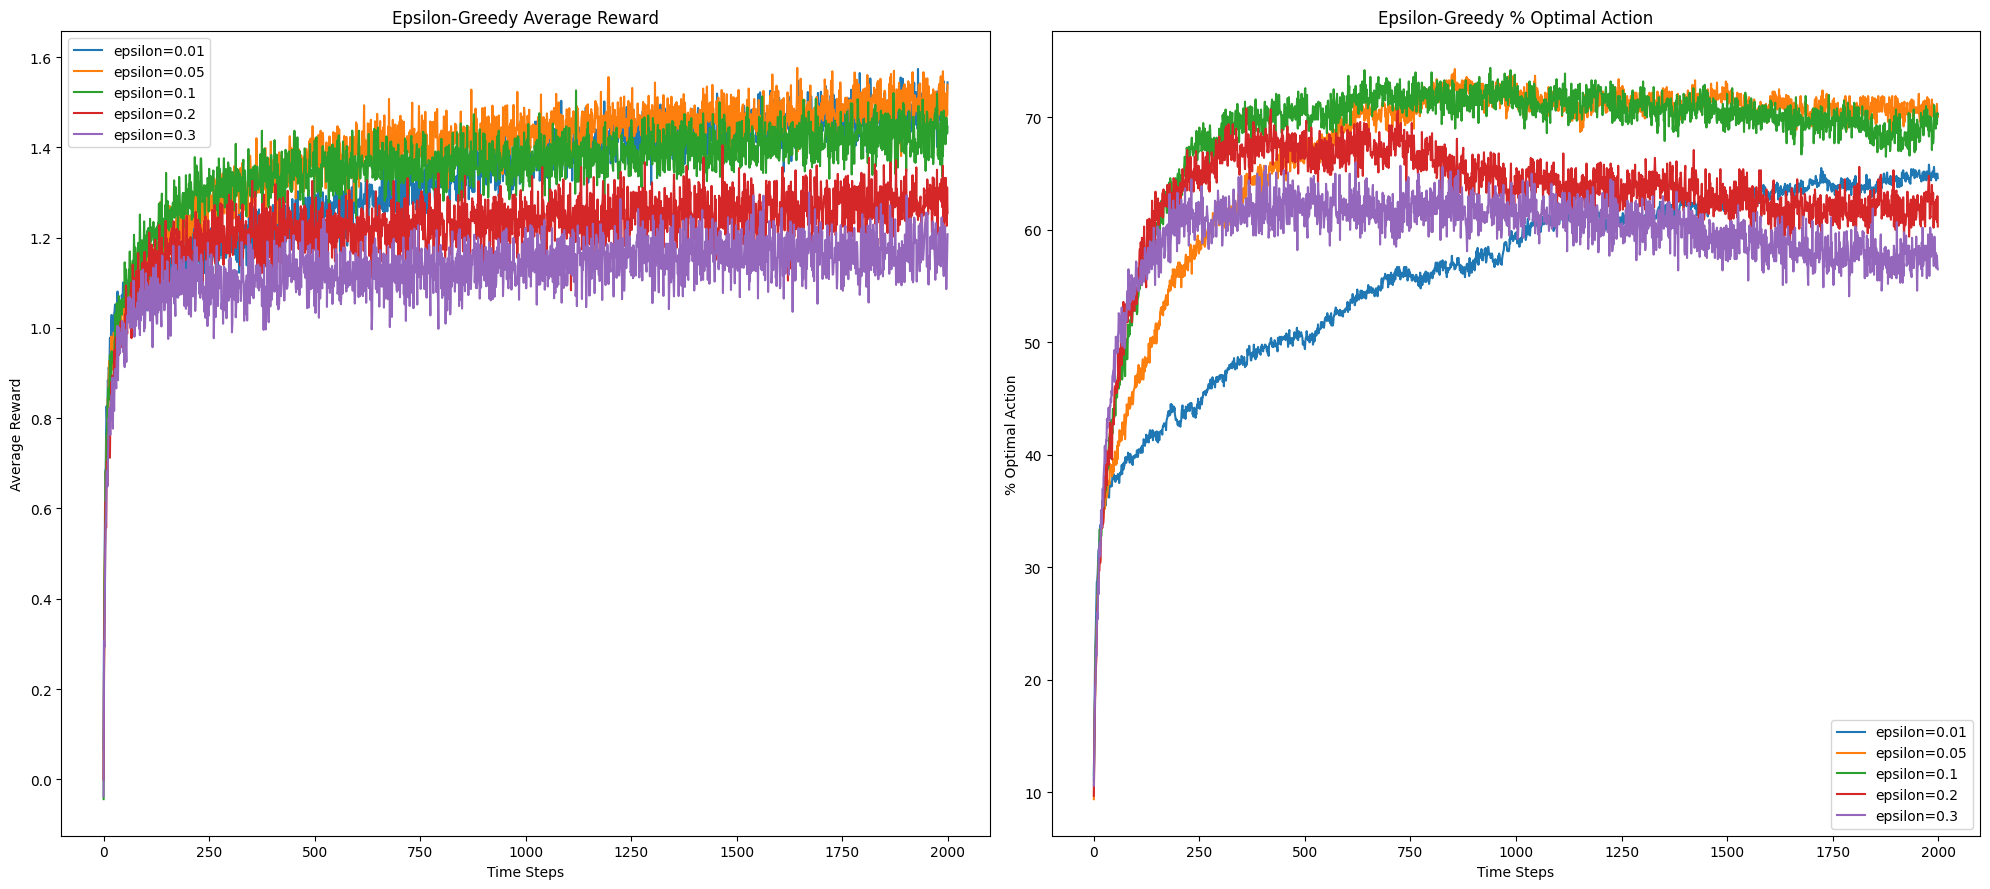

In [26]:
epsilon_values = [0.01, 0.05, 0.1, 0.2, 0.3]
results = {}

for eps in epsilon_values:
    avg_rewards, opt_percentage = nonstationary_simulation(
        EpsilonGreedy,
        GradualDriftBandit,
        k=10,
        steps=2000,
        simulations=1000,
        epsilon=eps
    )
    results[eps] = (avg_rewards, opt_percentage)

plot_epsilon_gradient(
    results_dict=results,
    param_values=epsilon_values,
    param_name="epsilon",
    title_prefix="Epsilon-Greedy"
)


# optimistic greedy

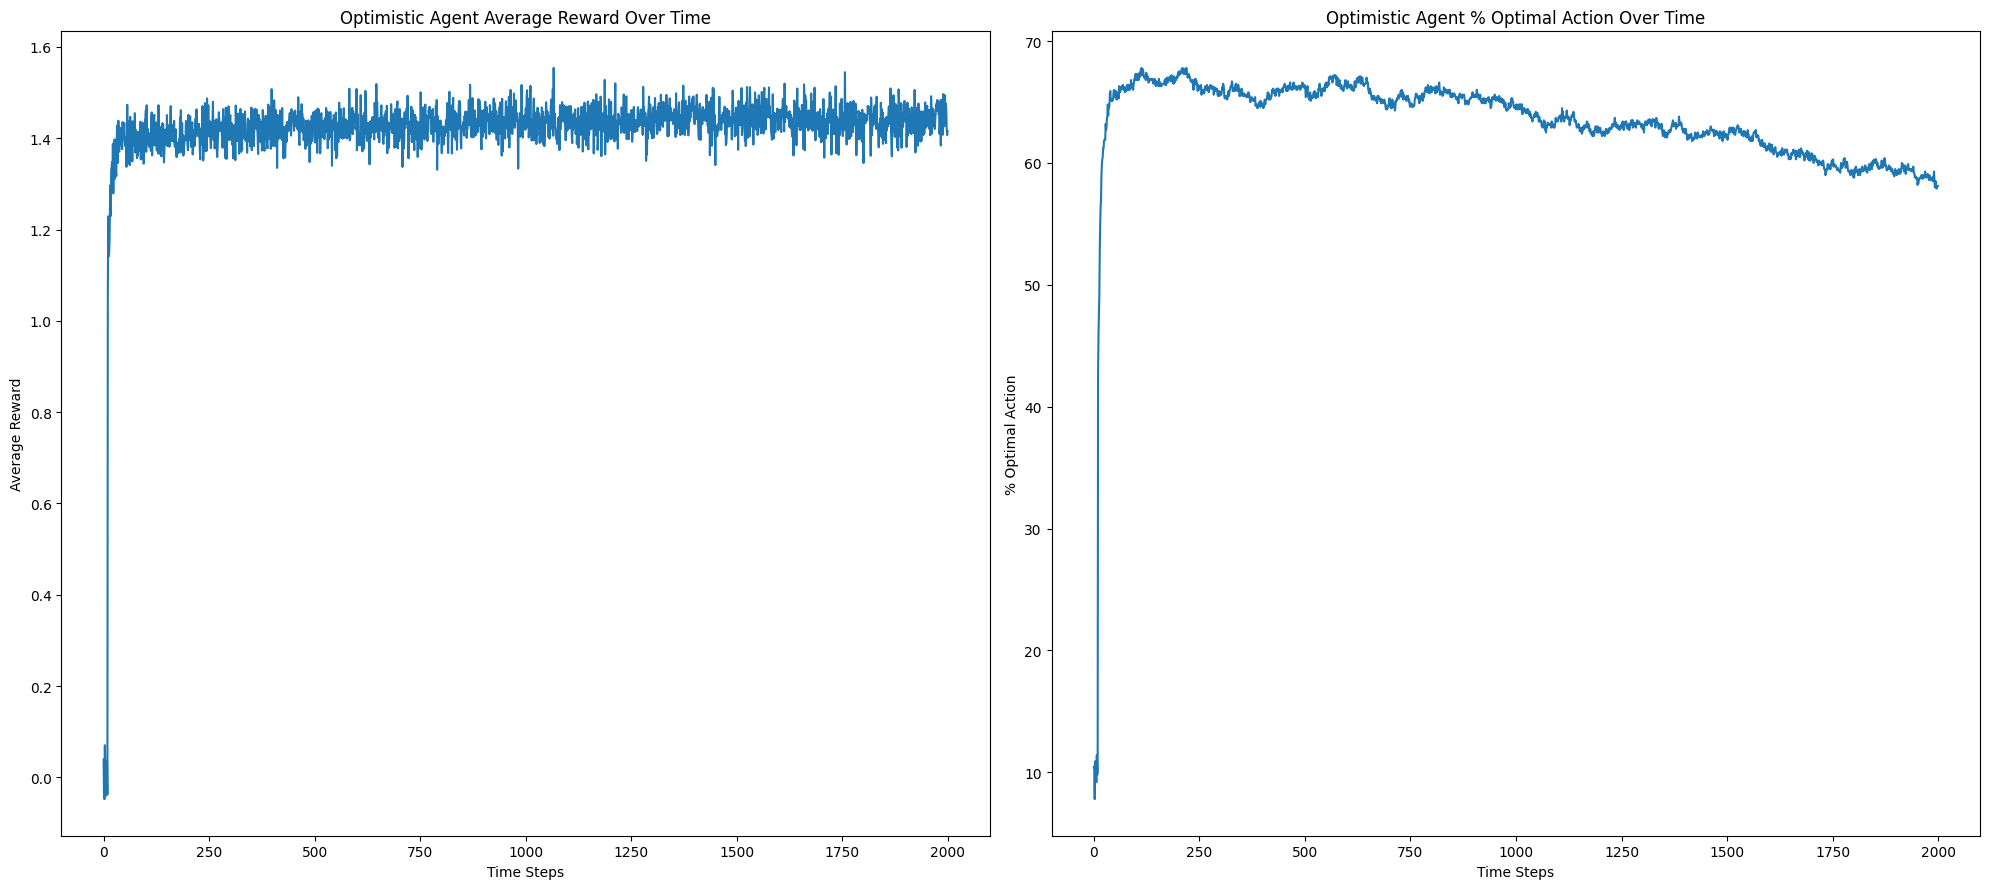

In [27]:
from scipy.stats import norm

def nonstationary_optimistic_simulation(bandit_class, k, steps, simulations):
    all_rewards = np.zeros((simulations, steps))
    optimal_action_counts = np.zeros((simulations, steps))

    for sim in range(simulations):
        # Create environment for this simulation
        bandit = bandit_class(k)

        # Compute optimistic value using initial true_means
        best_mu = np.max(bandit.true_means)
        optimistic_value = norm.ppf(0.995, loc=best_mu, scale=1)

        # Initialise agent
        agent = OptimisticGreedy(k, optimistic_value)

        for t in range(steps):
            bandit.update_means()
            optimal_action = bandit.optimal_action()

            action = agent.select_action()
            reward = bandit.pull(action)
            agent.update(action, reward)

            all_rewards[sim, t] = reward
            optimal_action_counts[sim, t] = (action == optimal_action)

    average_rewards = all_rewards.mean(axis=0)
    optimal_action_percentage = optimal_action_counts.mean(axis=0) * 100
    return average_rewards, optimal_action_percentage

avg_rewards_opt, opt_percentage_opt = nonstationary_optimistic_simulation(
    GradualDriftBandit, k=10, steps=2000, simulations=1000
)

plot_results(avg_rewards_opt, opt_percentage_opt, title='Optimistic Agent')

# Gradient Bandit

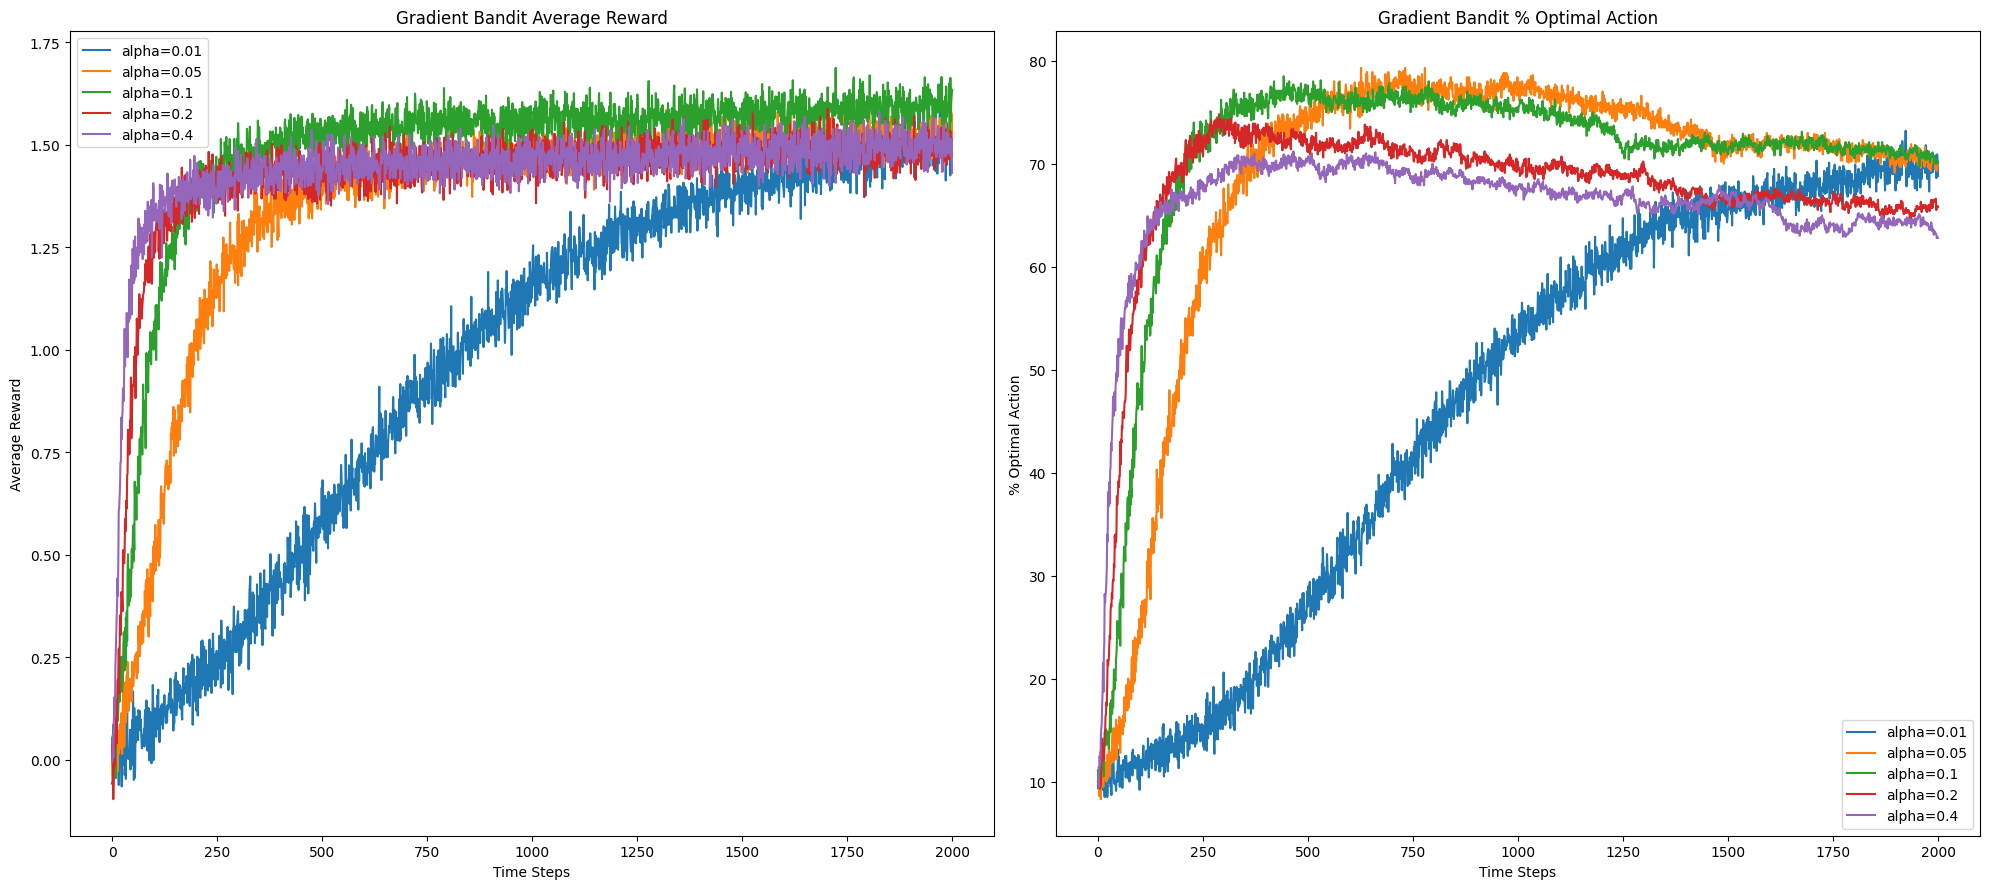

In [28]:
alpha_values = [0.01, 0.05, 0.1, 0.2, 0.4]
results = {}

for alpha in alpha_values:
    avg_rewards, opt_percentage = nonstationary_simulation(
        GradientBandit,
        GradualDriftBandit,
        k=10,
        steps=2000,
        simulations=1000,
        alpha=alpha
    )
    results[alpha] = (avg_rewards, opt_percentage)


plot_epsilon_gradient(
    results_dict=results,
    param_values=alpha_values,
    param_name="alpha",
    title_prefix="Gradient Bandit"
)


# MeanRevertingBandit

# Greedy

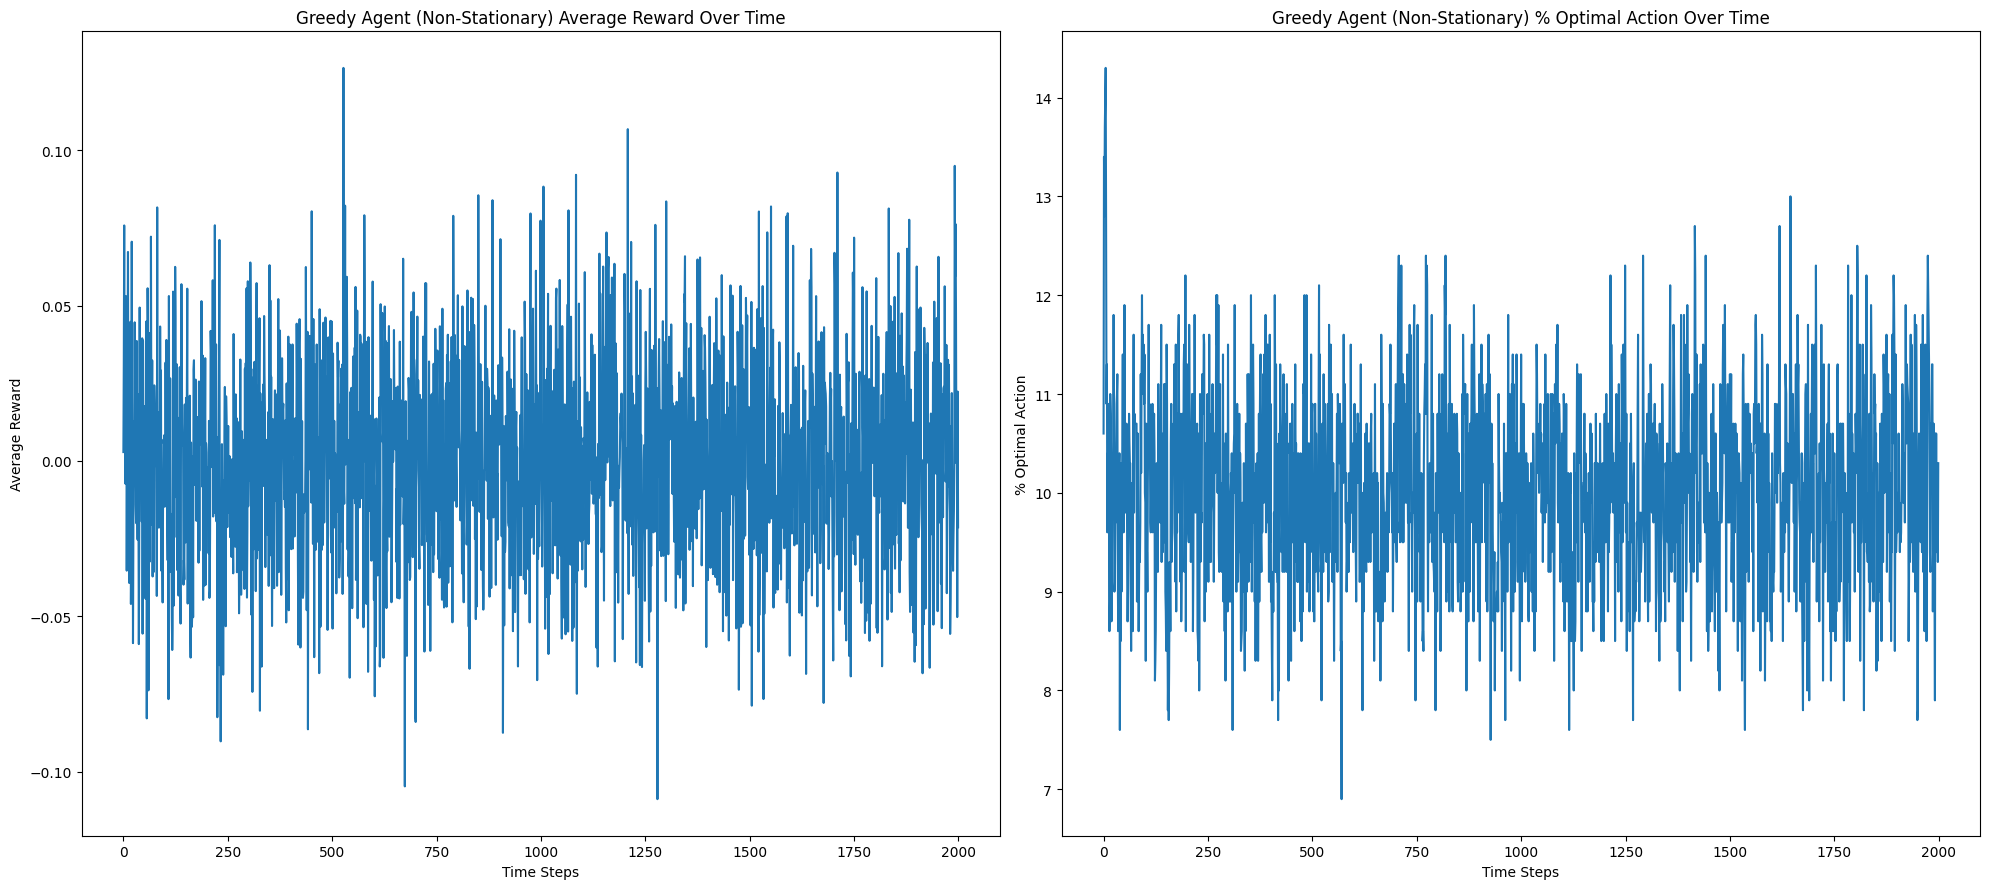

In [29]:

avg_rewards_greedy, opt_percentage_greedy = nonstationary_simulation(
    Greedy,
    MeanRevertingBandit,
    k=10,
    steps=2000,
    simulations=1000
)

plot_results(avg_rewards_greedy, opt_percentage_greedy, title='Greedy Agent (Non-Stationary)')

# Eplison Greedy

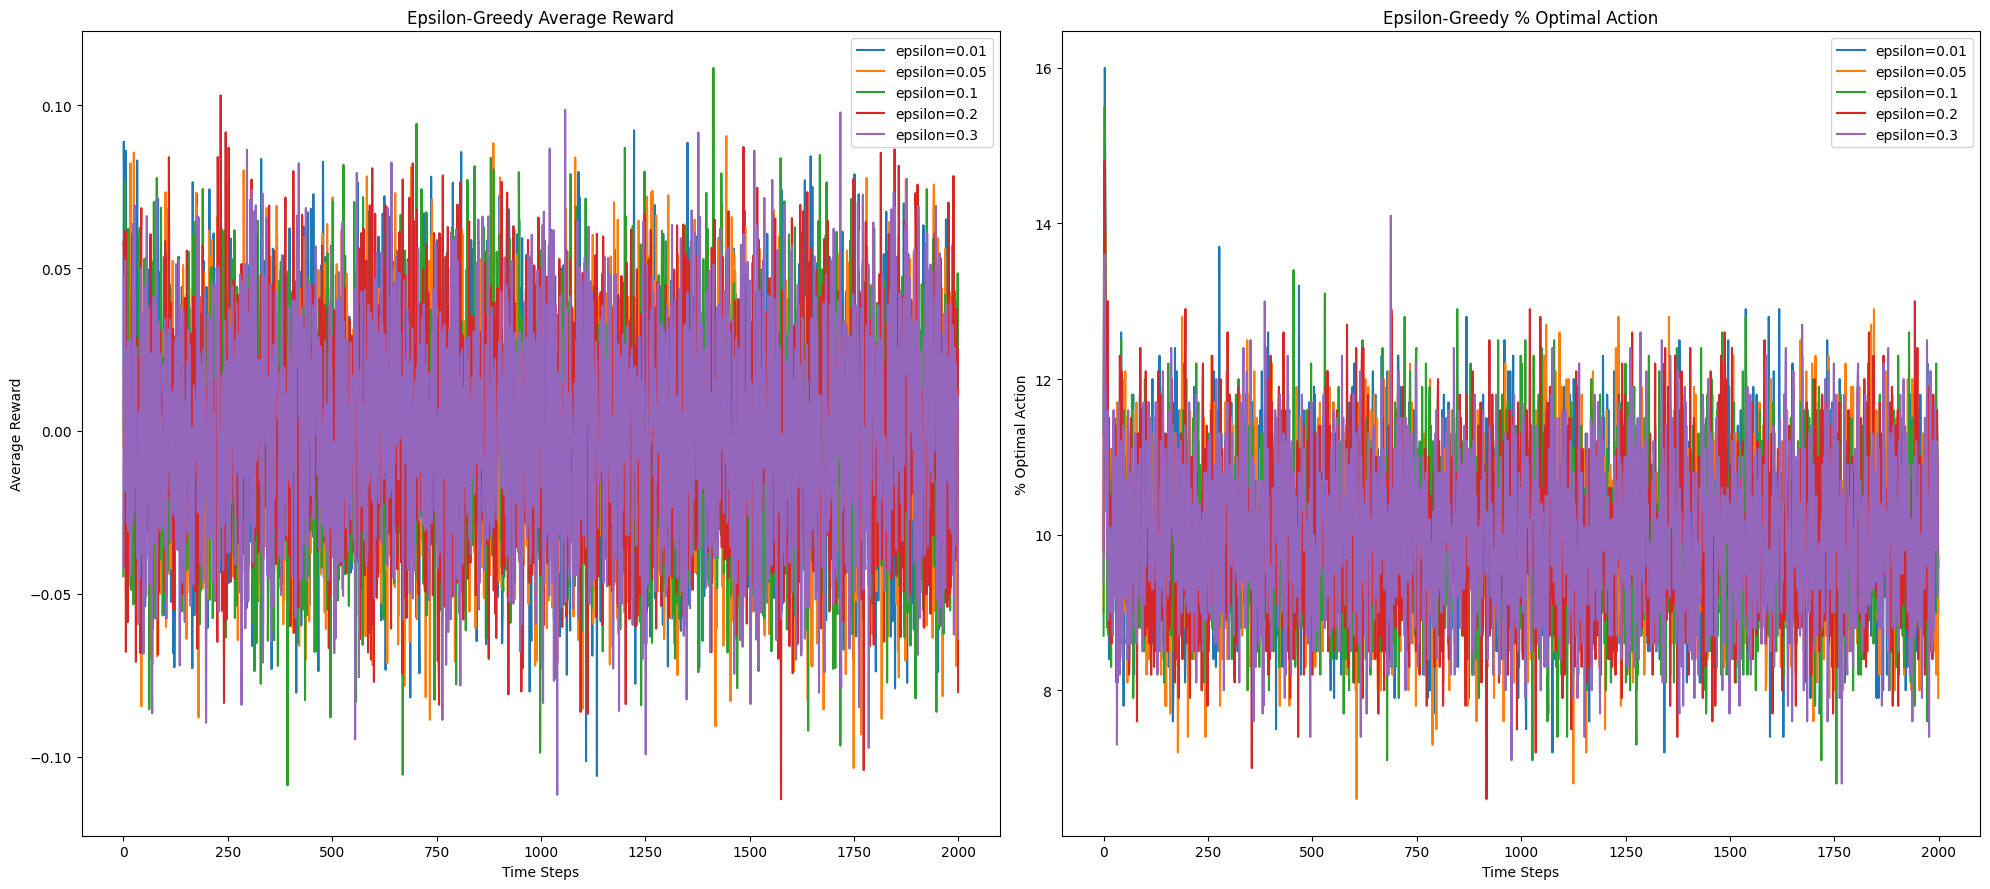

In [30]:
epsilon_values = [0.01, 0.05, 0.1, 0.2, 0.3]
results = {}

for eps in epsilon_values:
    avg_rewards, opt_percentage = nonstationary_simulation(
        EpsilonGreedy,
        MeanRevertingBandit,
        k=10,
        steps=2000,
        simulations=1000,
        epsilon=eps
    )
    results[eps] = (avg_rewards, opt_percentage)

plot_epsilon_gradient(
    results_dict=results,
    param_values=epsilon_values,
    param_name="epsilon",
    title_prefix="Epsilon-Greedy"
)

# Optimistic Greedy

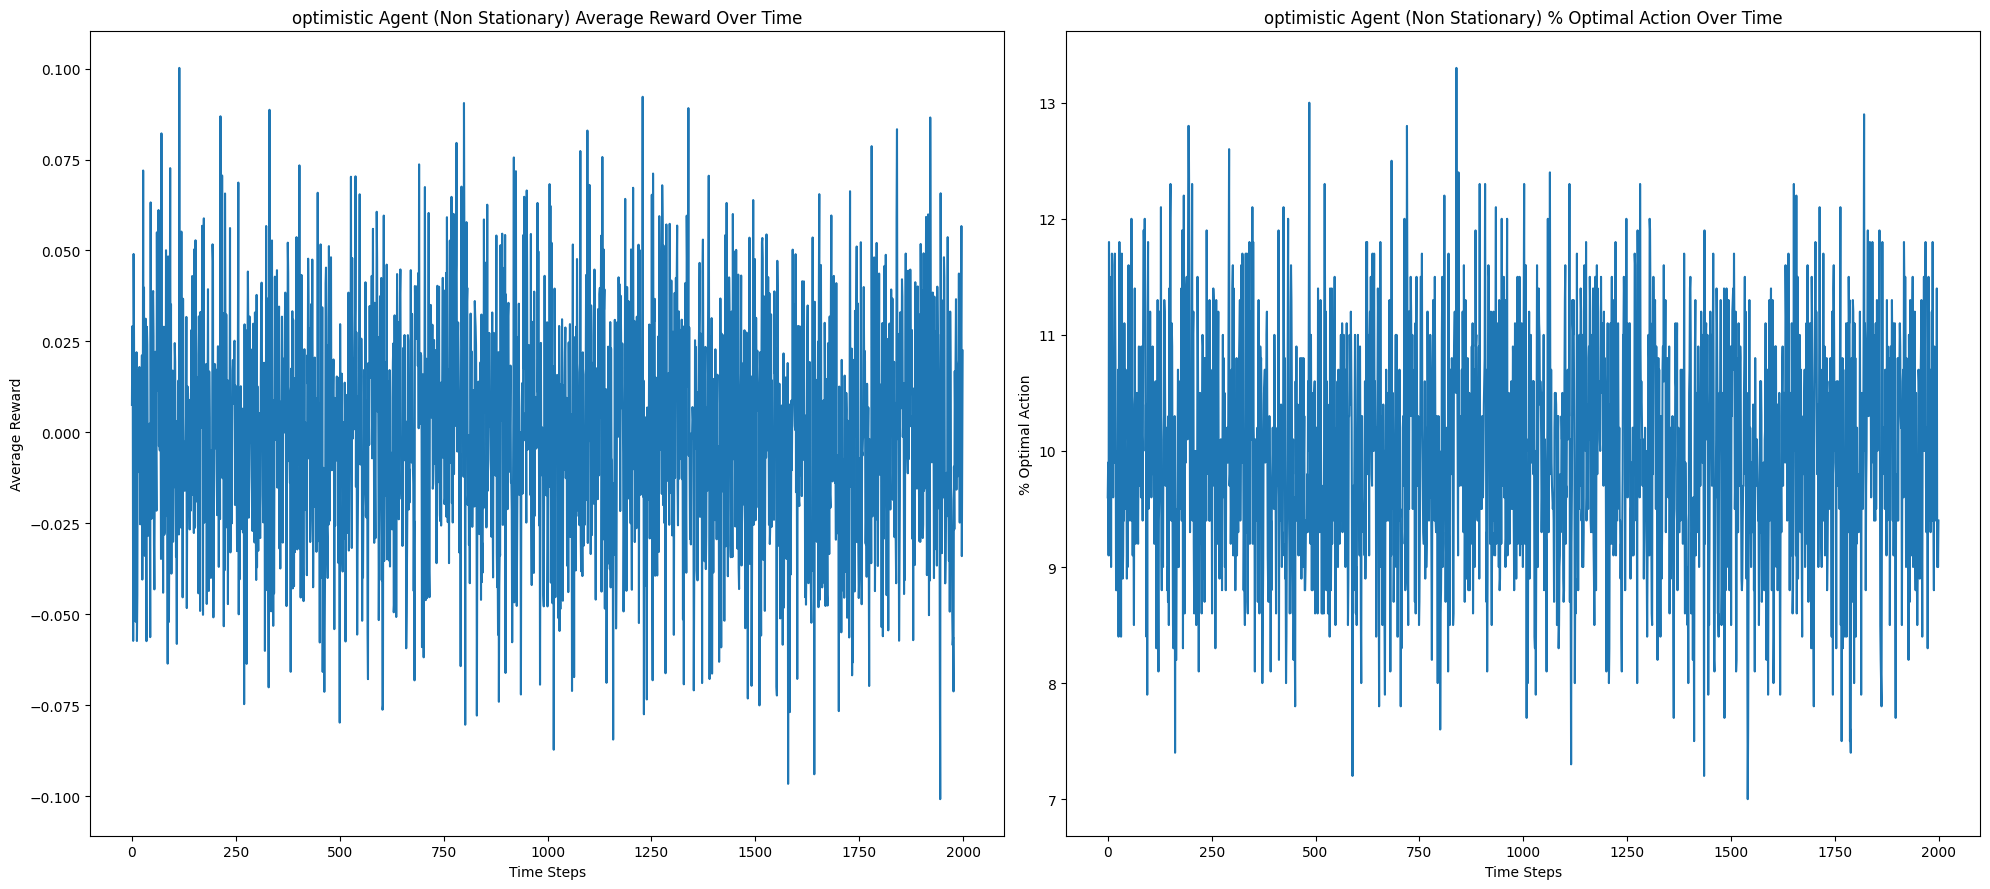

In [31]:
avg_rewards_opt, opt_percentage_opt = nonstationary_optimistic_simulation(
    MeanRevertingBandit, k=10, steps=2000, simulations=1000
)

plot_results(avg_rewards_opt, opt_percentage_opt, title='optimistic Agent (Non Stationary)')

# **GradientBandit**

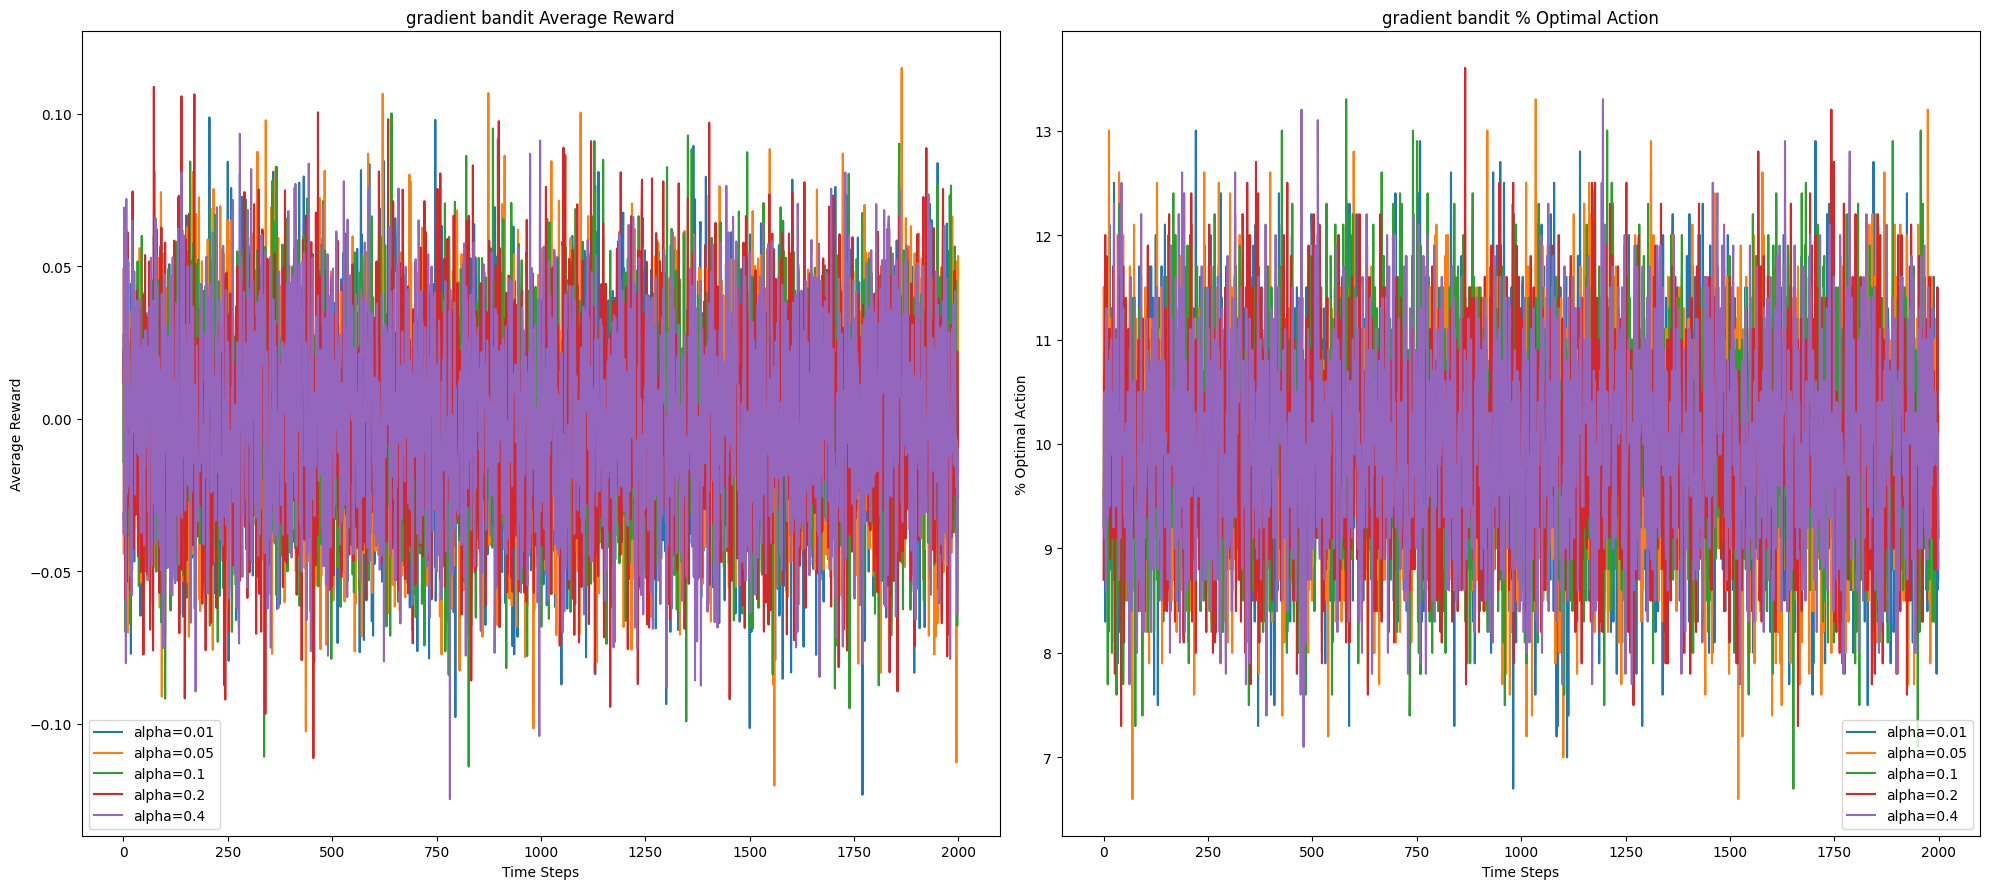

In [32]:
alpha_values = [0.01, 0.05, 0.1, 0.2, 0.4]
results = {}

for alpha in alpha_values:
    avg_rewards, opt_percentage = nonstationary_simulation(
        GradientBandit,
        MeanRevertingBandit,
        k=10,
        steps=2000,
        simulations=1000,
        alpha=alpha
    )
    results[alpha] = (avg_rewards, opt_percentage)


plot_epsilon_gradient(
    results_dict=results,
    param_values=alpha_values,
    param_name="alpha",
    title_prefix="gradient bandit"
)

# AbruptChangeBandit

In [33]:
import numpy as np

class AbruptChangeBandit:
    def __init__(self, k=10, seed=None, permutation=None, changepoint=501):
        self.k = k
        self.changepoint = changepoint
        self.seed = seed

        # Set up a reproducible RNG using the provided seed
        self.rng = np.random.default_rng(seed)

        # Generate initial true means for the k arms
        self.initial_means = self.rng.normal(0, 1, k)
        self.true_means = self.initial_means.copy()

        # Store the fixed permutation to apply at changepoint
        self.permutation = permutation if permutation is not None else self.rng.permutation(k)

        # Keep internal time step counter to know when to apply the change
        self.time = 0

    def update_means(self):
        # At the changepoint, permute the true means
        self.time += 1
        if self.time == self.changepoint:
            self.true_means = self.true_means[self.permutation]

    def pull(self, action):
        # Sample reward from N(mean[action], 1)
        return self.rng.normal(self.true_means[action], 1)

    def optimal_action(self):
        return np.argmax(self.true_means)


In [34]:
# fixed seed for permutation
np.random.seed(123)
# for k=10 arms
fixed_permutation = np.random.permutation(10)


In [35]:
np.random.seed(42)
# one seed per simulation
simulation_seeds = np.random.randint(0, 1e6, size=1000)


In [36]:
# Greedy Simulation Function (abrupt changes)
def abrupt_greedy_simulation(agent_class, k, steps, simulations, hard_reset=False):
    all_rewards = np.zeros((simulations, steps))
    optimal_action_counts = np.zeros((simulations, steps))

    for sim in range(simulations):
        np.random.seed(sim)
        true_means = np.random.normal(0, 1, k)
        permuted_means = np.random.permutation(true_means)
        agent = agent_class(k)

        for t in range(steps):
            if t == 501:
                true_means = permuted_means.copy()
                if hard_reset:
                    agent = agent_class(k)  # reinitialise completely

            optimal_action = np.argmax(true_means)
            action = agent.select_action()
            reward = np.random.normal(true_means[action], 1)
            agent.update(action, reward)

            all_rewards[sim, t] = reward
            optimal_action_counts[sim, t] = (action == optimal_action)

    avg_rewards = all_rewards.mean(axis=0)
    optimal_action_pct = optimal_action_counts.mean(axis=0) * 100
    return avg_rewards, optimal_action_pct




In [37]:
# Optimistic Greedy Simulation Function (abrupt changes)
def abrupt_optimistic_simulation(agent_class, k, steps, simulations, compute_optimistic_value_fn, hard_reset=False):
    all_rewards = np.zeros((simulations, steps))
    optimal_action_counts = np.zeros((simulations, steps))

    for sim in range(simulations):
        np.random.seed(sim)
        true_means = np.random.normal(0, 1, k)
        permuted_means = np.random.permutation(true_means)
        optimistic_value = compute_optimistic_value_fn(true_means)
        agent = agent_class(k, optimistic_value)

        for t in range(steps):
            if t == 501:
                true_means = permuted_means.copy()
                if hard_reset:
                    optimistic_value = compute_optimistic_value_fn(true_means)
                    agent = agent_class(k, optimistic_value)

            optimal_action = np.argmax(true_means)
            action = agent.select_action()
            reward = np.random.normal(true_means[action], 1)
            agent.update(action, reward)

            all_rewards[sim, t] = reward
            optimal_action_counts[sim, t] = (action == optimal_action)

    avg_rewards = all_rewards.mean(axis=0)
    optimal_action_pct = optimal_action_counts.mean(axis=0) * 100
    return avg_rewards, optimal_action_pct



In [38]:

# General Simulation Function (for param-based agents like EpsilonGreedy or GradientBandit)
def abrupt_simulation(agent_class, k, steps, simulations, param, param_type='epsilon', hard_reset=False):
    all_rewards = np.zeros((simulations, steps))
    optimal_action_counts = np.zeros((simulations, steps))

    for sim in range(simulations):
        np.random.seed(sim)
        true_means = np.random.normal(0, 1, k)
        permuted_means = np.random.permutation(true_means)

        if param_type == 'epsilon':
            agent = agent_class(k, param)
        elif param_type == 'alpha':
            agent = agent_class(k, param)
        else:
            raise ValueError("Invalid param_type. Use 'epsilon' or 'alpha'.")

        for t in range(steps):
            if t == 501:
                true_means = permuted_means.copy()
                if hard_reset:
                    if param_type == 'epsilon':
                        agent = agent_class(k, param)
                    elif param_type == 'alpha':
                        agent = agent_class(k, param)

            optimal_action = np.argmax(true_means)
            action = agent.select_action()
            reward = np.random.normal(true_means[action], 1)
            agent.update(action, reward)

            all_rewards[sim, t] = reward
            optimal_action_counts[sim, t] = (action == optimal_action)

    avg_rewards = all_rewards.mean(axis=0)
    optimal_action_pct = optimal_action_counts.mean(axis=0) * 100
    return avg_rewards, optimal_action_pct


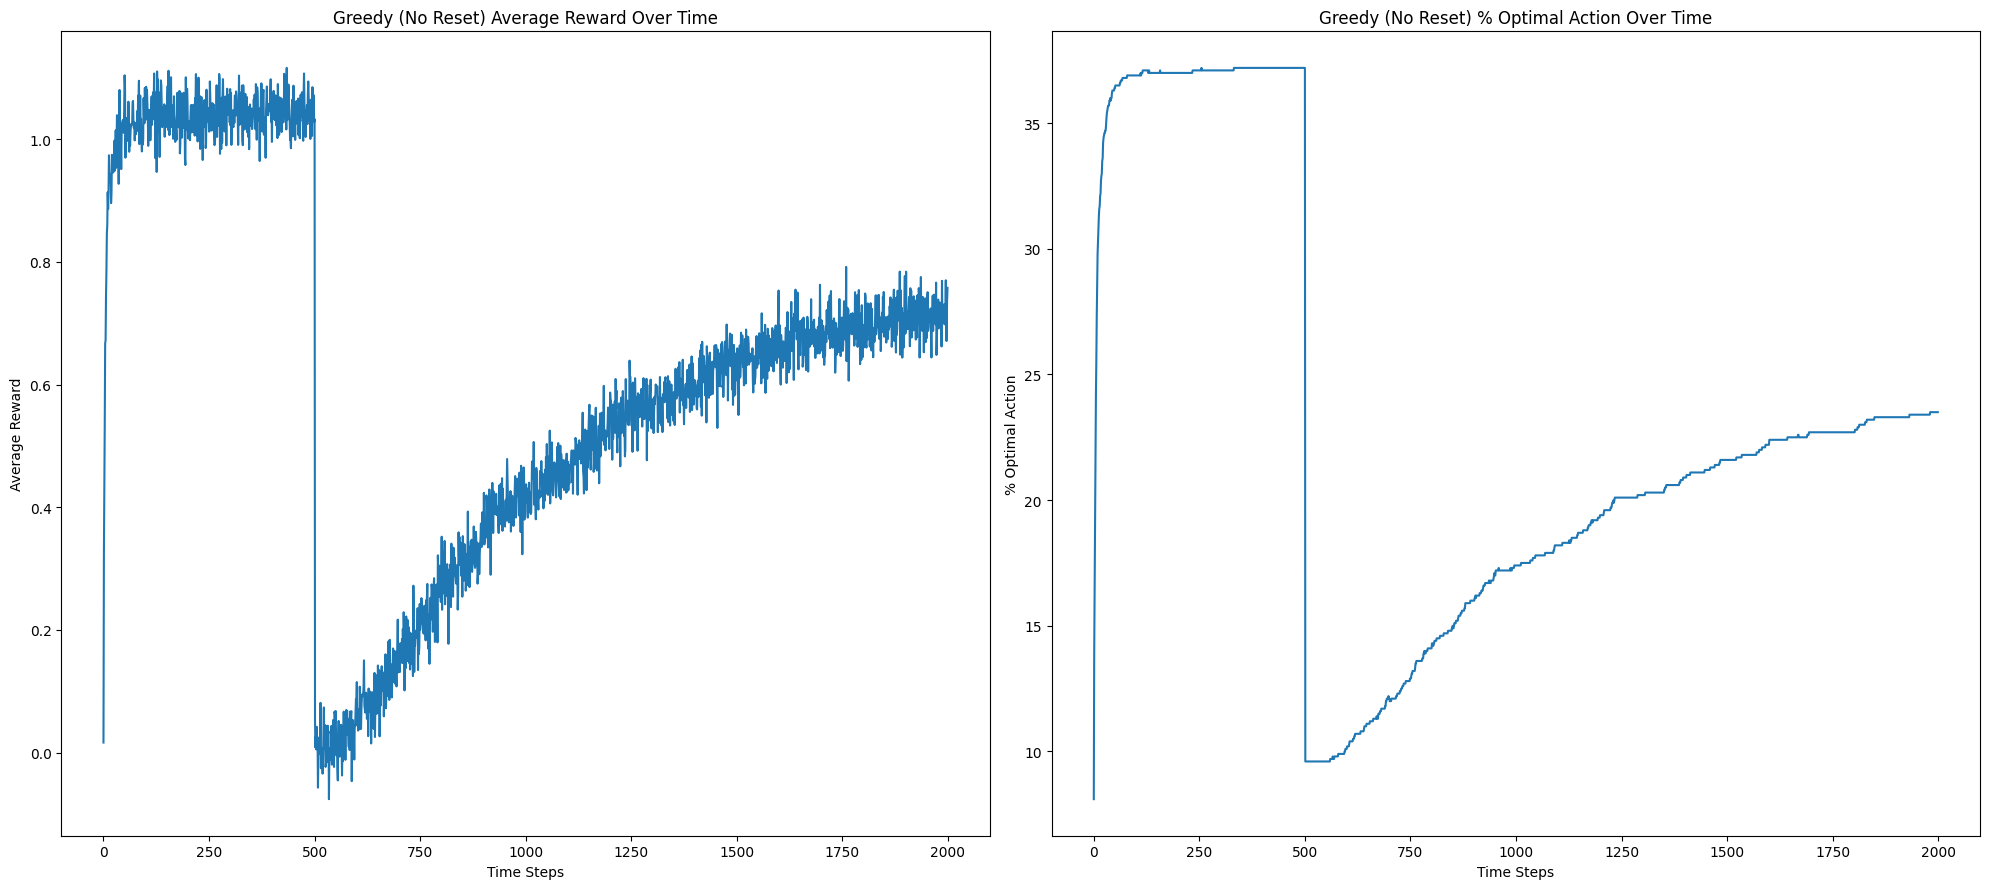

In [39]:
avg_rewards_greedy_n, opt_pct_greedy_n = abrupt_greedy_simulation(
    agent_class=Greedy,
    k=10,
    steps=2000,
    simulations=1000,
    hard_reset=False
)

plot_results(
    avg_rewards_greedy_n,
    opt_pct_greedy_n,
    title='Greedy (No Reset)'
)


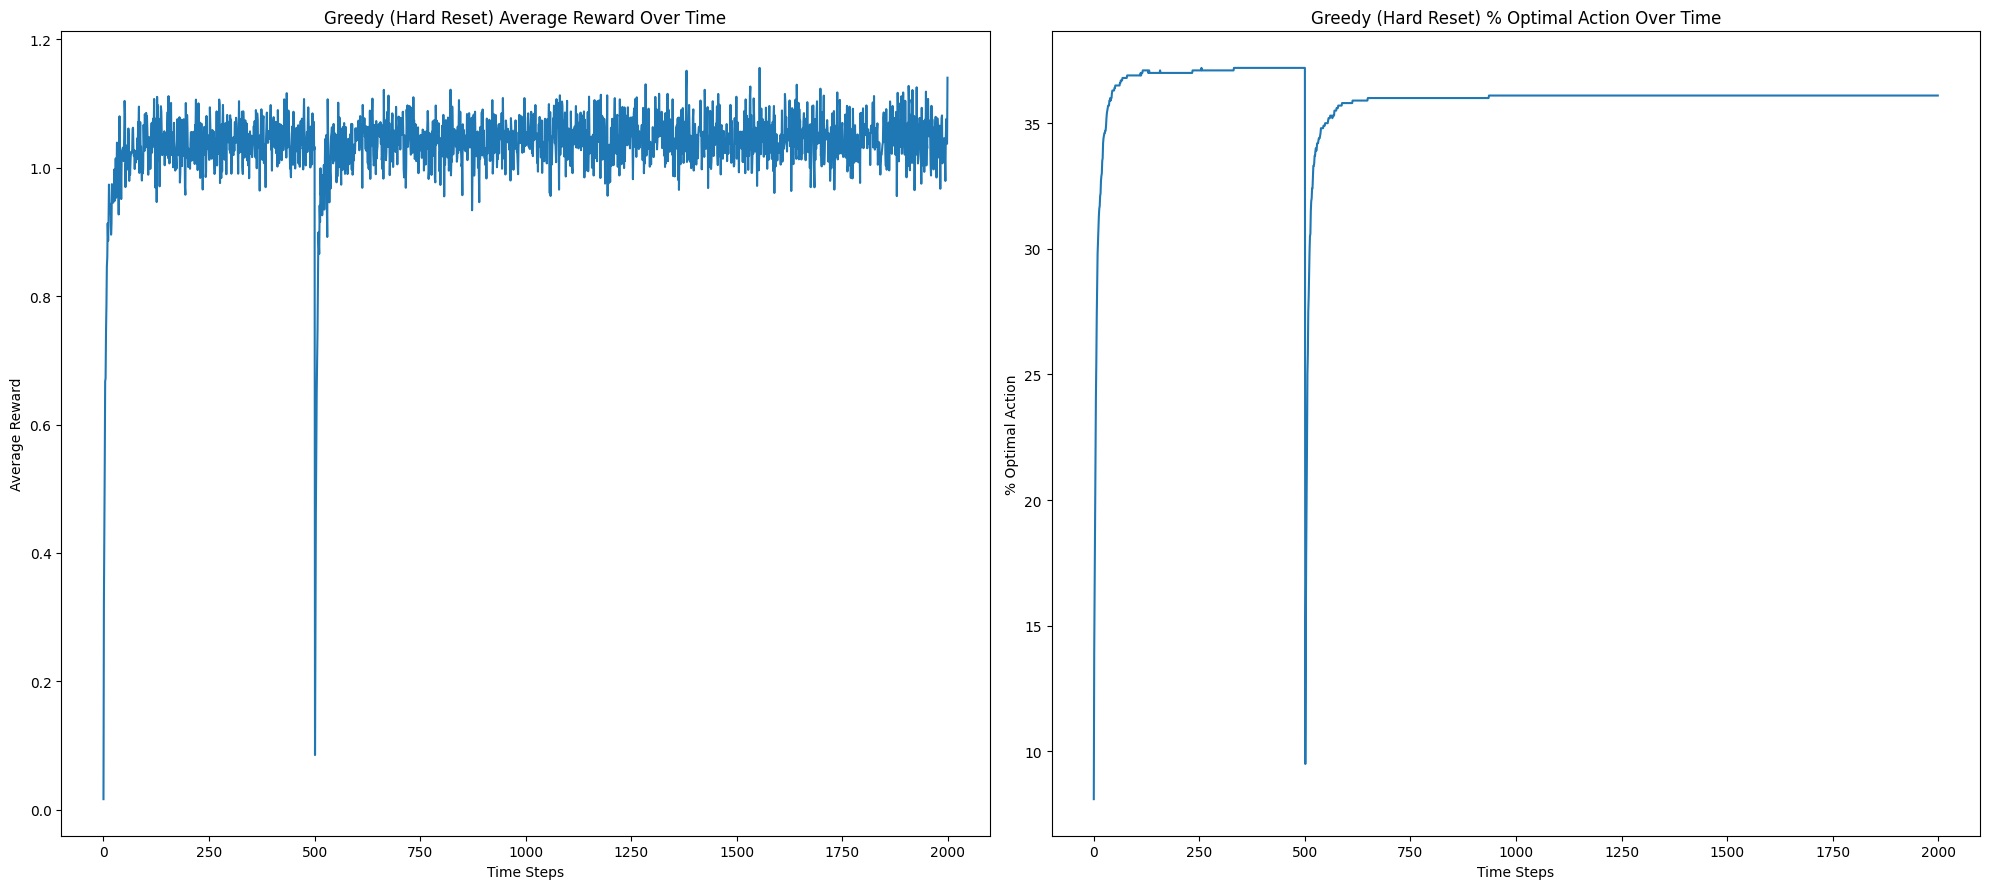

In [40]:
avg_rewards_greedy_r, opt_pct_greedy_r = abrupt_greedy_simulation(
    agent_class=Greedy,
    k=10,
    steps=2000,
    simulations=1000,
    hard_reset=True
)

plot_results(
    avg_rewards_greedy_r,
    opt_pct_greedy_r,
    title='Greedy (Hard Reset)'
)


# Epsilon-Greedy ( No Reset)

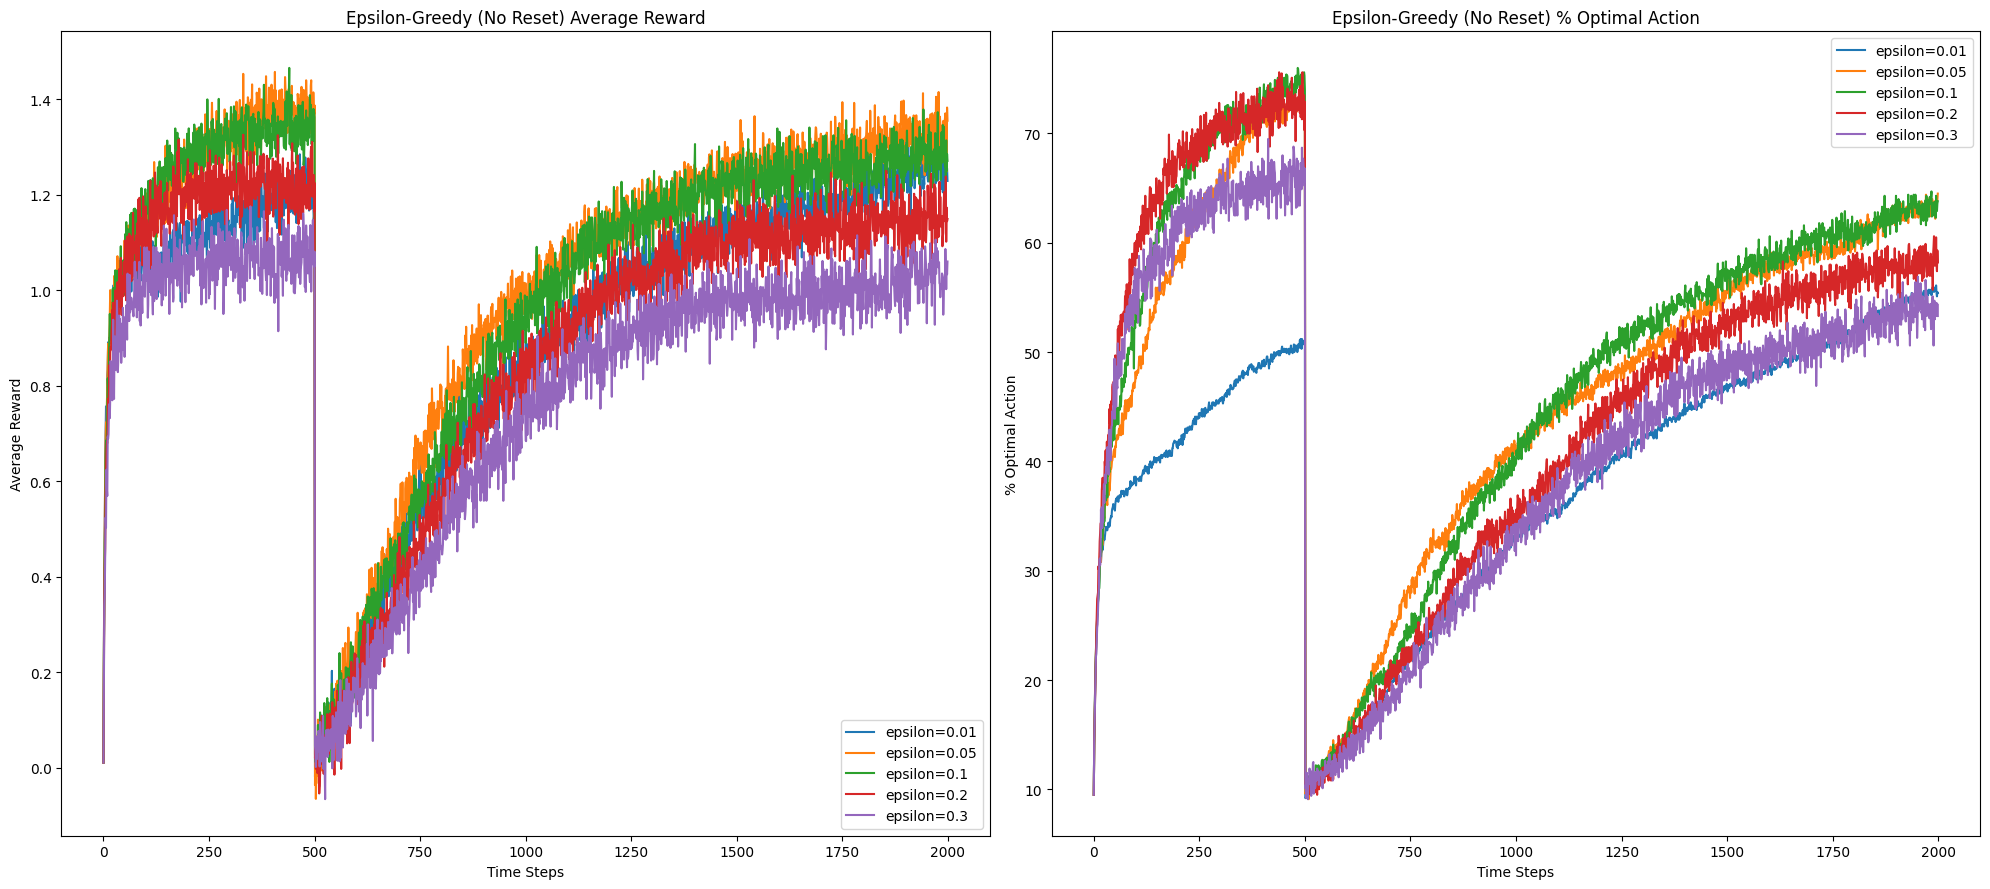

In [41]:
epsilon_values = [0.01, 0.05, 0.1, 0.2, 0.3]
eg_noreset_results = {}

for eps in epsilon_values:
    avg_rewards, opt_pct = abrupt_simulation(
        EpsilonGreedy,
        k=10,
        steps=2000,
        simulations=1000,
        param=eps,
        param_type='epsilon',
        hard_reset=False
    )
    eg_noreset_results[eps] = (avg_rewards, opt_pct)

plot_epsilon_gradient(
    eg_noreset_results,
    epsilon_values,
    param_name="epsilon",
    title_prefix="Epsilon-Greedy (No Reset)"
)


# Epsilon-Greedy (Hard Reset)

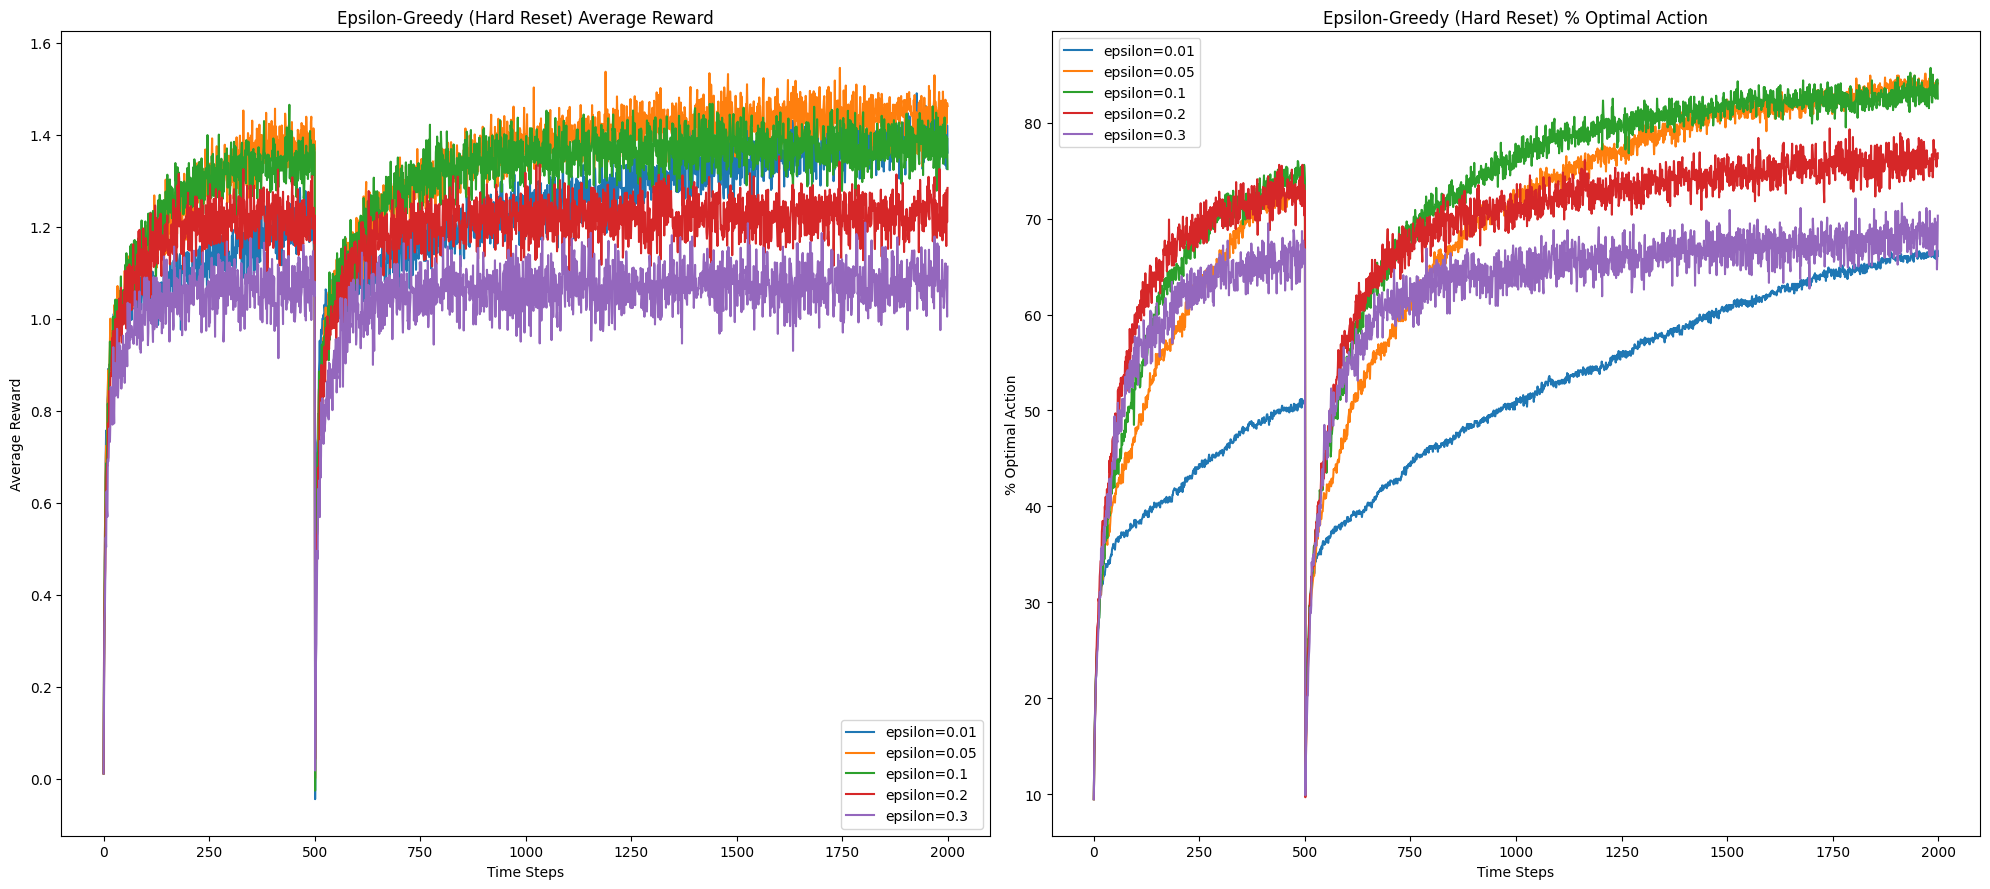

In [42]:
eg_reset_results = {}

for eps in epsilon_values:
    avg_rewards, opt_pct = abrupt_simulation(
        EpsilonGreedy,
        k=10,
        steps=2000,
        simulations=1000,
        param=eps,
        param_type='epsilon',
        hard_reset=True
    )
    eg_reset_results[eps] = (avg_rewards, opt_pct)

plot_epsilon_gradient(
    eg_reset_results,
    epsilon_values,
    param_name="epsilon",
    title_prefix="Epsilon-Greedy (Hard Reset)"
)


# Optimistic Greedy (No Reset)

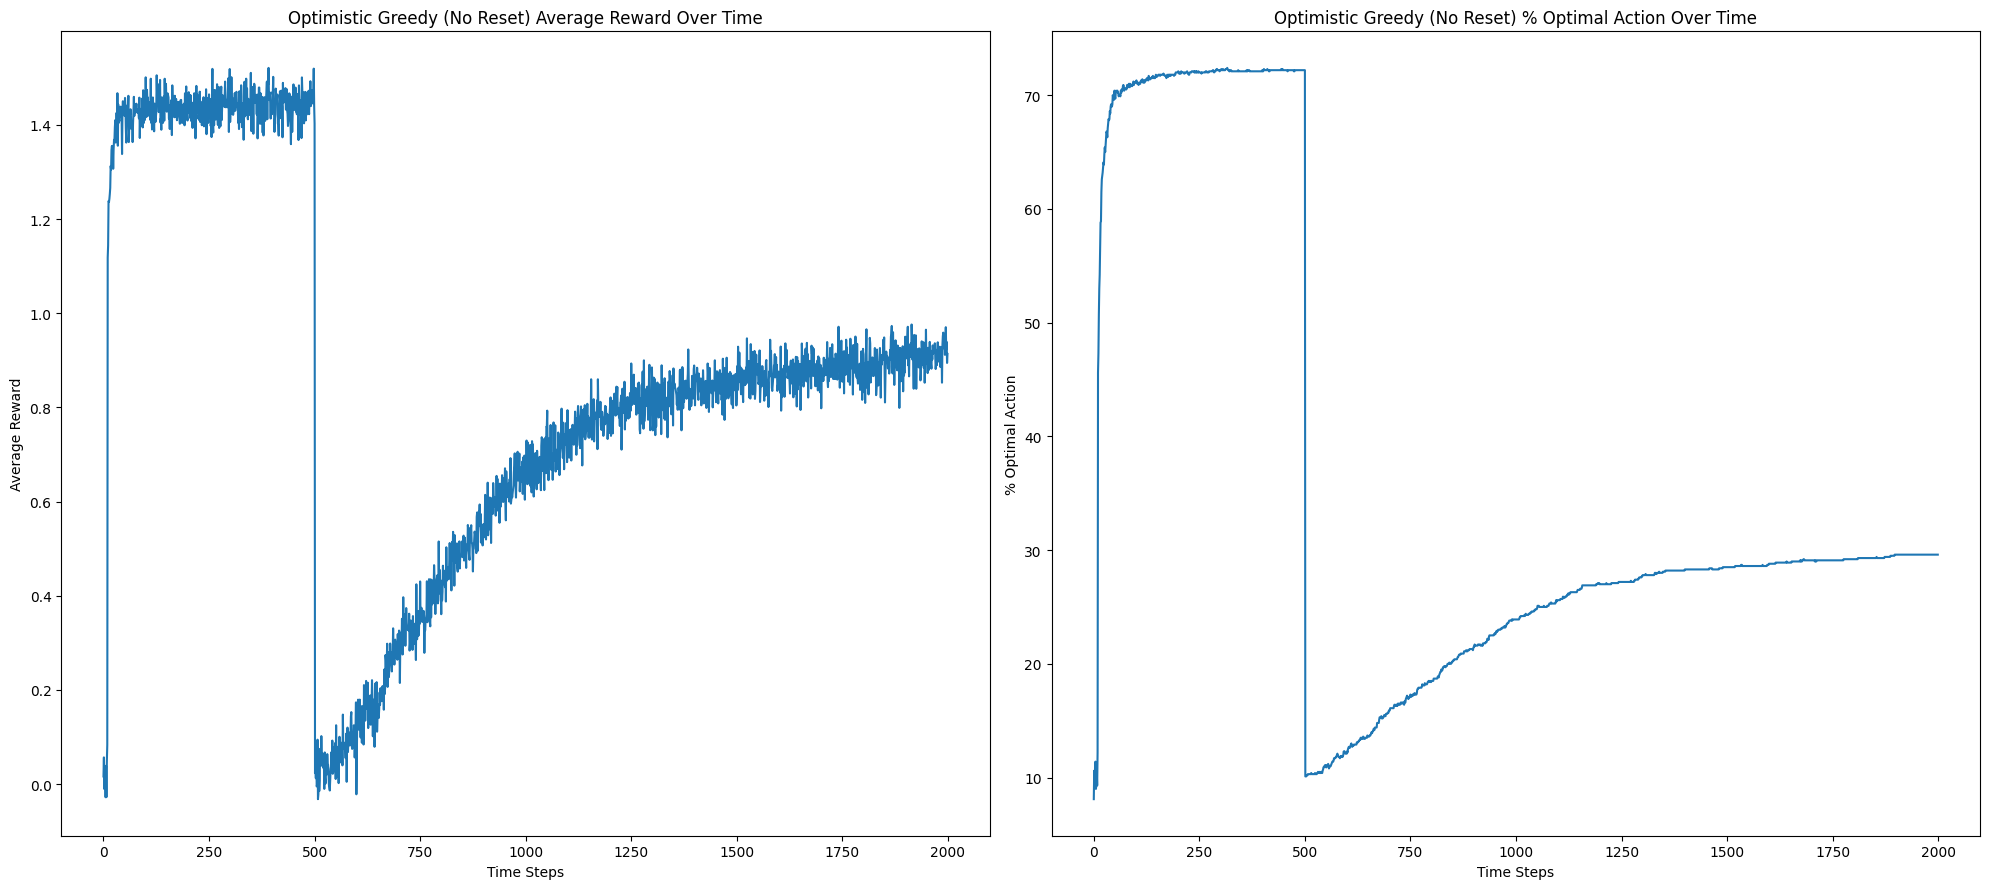

In [43]:
avg_rewards_opt_n, opt_pct_opt_n = abrupt_optimistic_simulation(
    agent_class=OptimisticGreedy,
    k=10,
    steps=2000,
    simulations=1000,
    compute_optimistic_value_fn=compute_optimistic_value,
    hard_reset=False
)

plot_results(
    avg_rewards_opt_n,
    opt_pct_opt_n,
    title='Optimistic Greedy (No Reset)'
)


# Optimistic Greedy (Hard Reset)

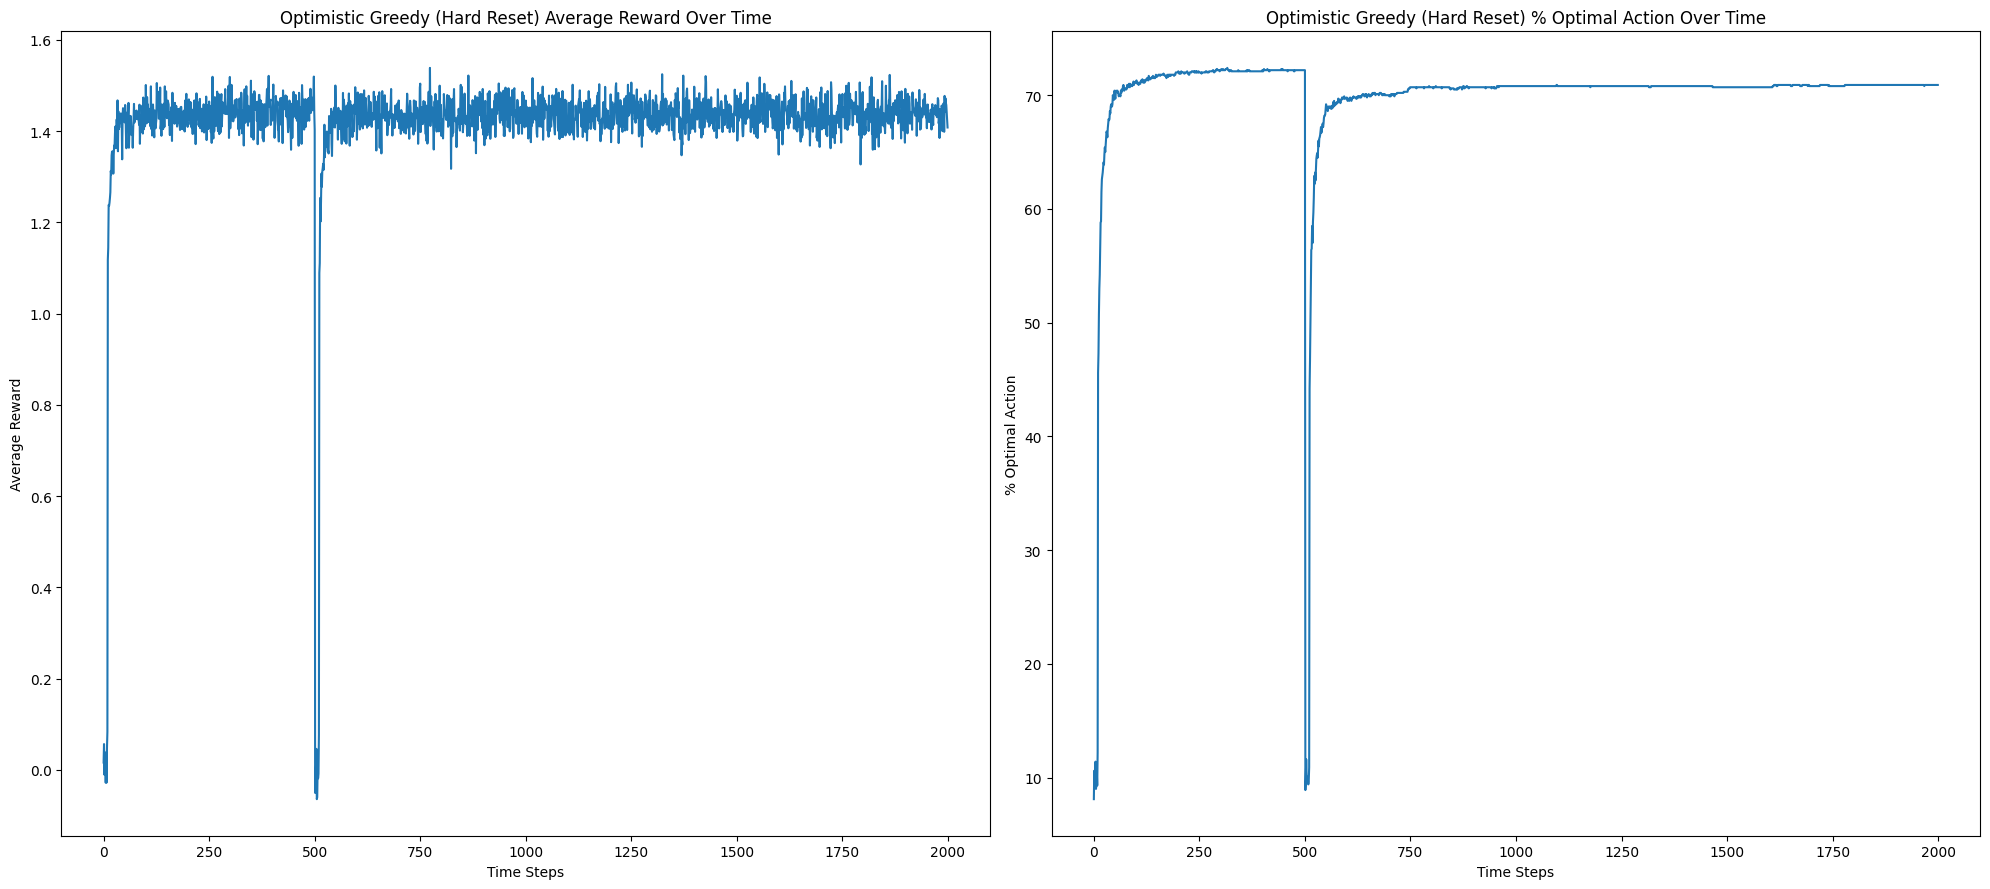

In [44]:
avg_rewards_opt_r, opt_pct_opt_r = abrupt_optimistic_simulation(
    agent_class=OptimisticGreedy,
    k=10,
    steps=2000,
    simulations=1000,
    compute_optimistic_value_fn=compute_optimistic_value,
    hard_reset=True
)

plot_results(
    avg_rewards_opt_r,
    opt_pct_opt_r,
    title='Optimistic Greedy (Hard Reset)'
)


# Gradient Bandit (No Reset)

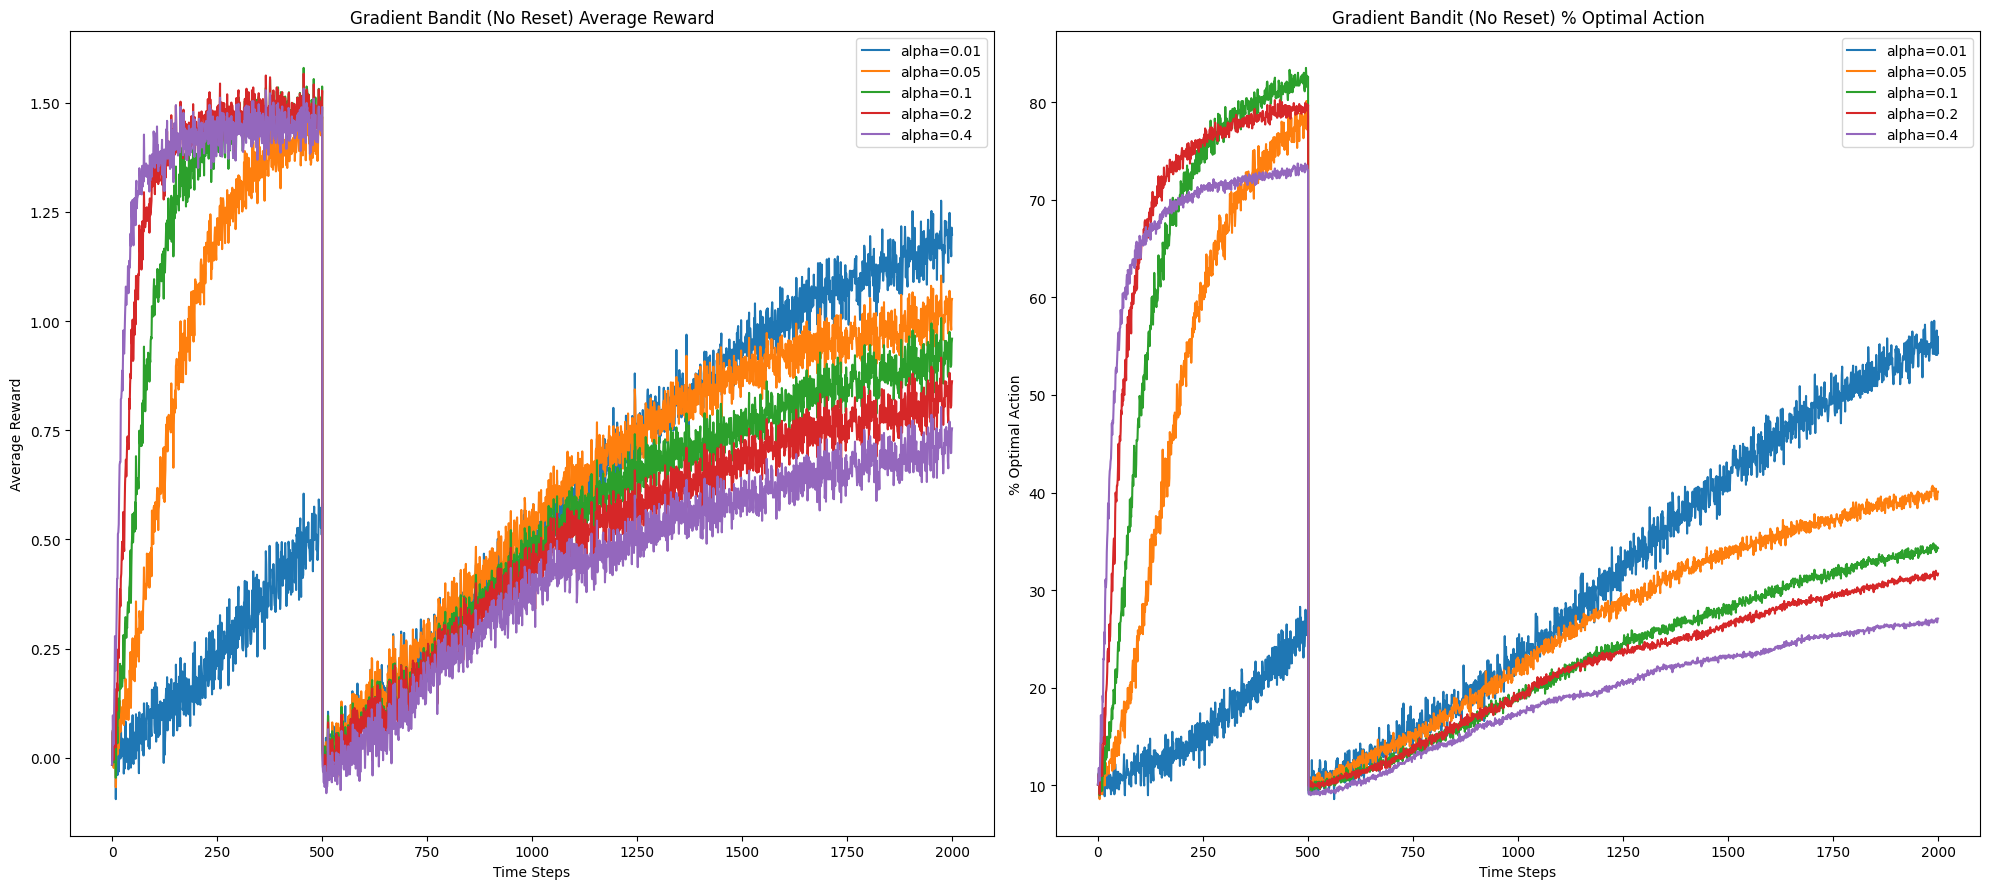

In [46]:
alpha_values = [0.01, 0.05, 0.1, 0.2, 0.4]
grad_noreset_results = {}

for alpha in alpha_values:
    avg_rewards, opt_pct = abrupt_simulation(
        GradientBandit,
        k=10,
        steps=2000,
        simulations=1000,
        param=alpha,
        param_type='alpha',
        hard_reset=False
    )
    grad_noreset_results[alpha] = (avg_rewards, opt_pct)

plot_epsilon_gradient(
    grad_noreset_results,
    alpha_values,
    param_name="alpha",
    title_prefix="Gradient Bandit (No Reset)"
)


# Gradient Bandit (Hard Reset)

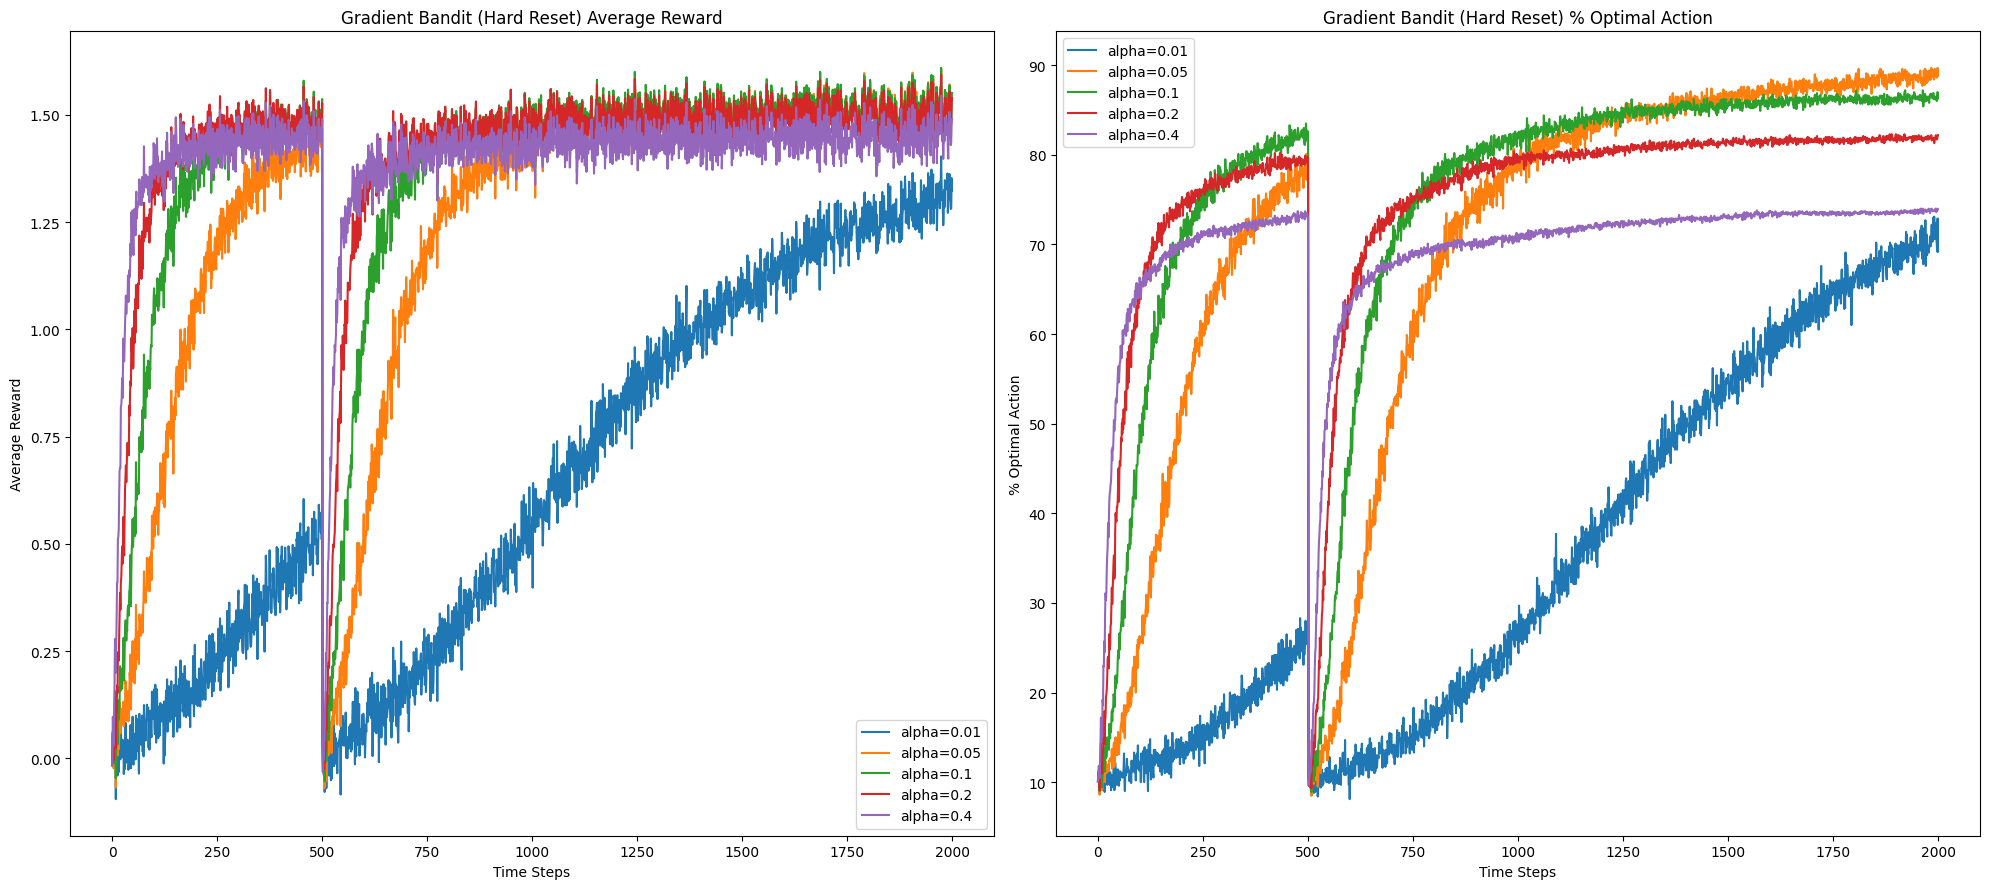

In [47]:
grad_reset_results = {}

for alpha in alpha_values:
    avg_rewards, opt_pct = abrupt_simulation(
        GradientBandit,
        k=10,
        steps=2000,
        simulations=1000,
        param=alpha,
        param_type='alpha',
        hard_reset=True
    )
    grad_reset_results[alpha] = (avg_rewards, opt_pct)

plot_epsilon_gradient(
    grad_reset_results,
    alpha_values,
    param_name="alpha",
    title_prefix="Gradient Bandit (Hard Reset)"
)
